# Risk Credit

## Data Cleaning & EDA

### Bureau

#### Import Dataset

In [1]:
import pandas as pd

In [2]:
# Import Dataset 'berau'
bureau = pd.read_csv('bureau.csv')
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


#### Handling Duplicate Value

In [3]:
# Cheking shape
print('bureau shape =', bureau.shape)

bureau shape = (1716428, 17)


In [4]:
# Cheking duplicate value

print('bureau duplicated = ', bureau.duplicated().sum())

bureau duplicated =  0


#### Handling Missing Value

In [5]:
# checking persentage missing value 
total_null = pd.DataFrame(bureau.isnull().sum(),columns=['Total_Null_Values'])
total_null['Percentage'] = (total_null['Total_Null_Values']/bureau.shape[0])*100
total_null = total_null.sort_values(by='Percentage', ascending=False).reset_index()
total_null

,index,Total_Null_Values,Percentage
0,AMT_ANNUITY,1226791,71.473490
1,AMT_CREDIT_MAX_OVERDUE,1124488,65.513264
2,DAYS_ENDDATE_FACT,633653,36.916958
3,AMT_CREDIT_SUM_LIMIT,591780,34.477415
4,AMT_CREDIT_SUM_DEBT,257669,15.011932
5,DAYS_CREDIT_ENDDATE,105553,6.149573
6,AMT_CREDIT_SUM,13,0.000757
7,CREDIT_ACTIVE,0,0.000000
8,CREDIT_CURRENCY,0,0.000000
9,DAYS_CREDIT,0,0.000000


In [6]:
# Drop colums have more then 50% missing value
bureau.drop(['AMT_ANNUITY', 'AMT_CREDIT_MAX_OVERDUE'], inplace=True, axis=1)

# Filled Missing Value 
bureau['DAYS_ENDDATE_FACT'].fillna(0, inplace=True)
bureau['AMT_CREDIT_SUM_LIMIT'].fillna(bureau['AMT_CREDIT_SUM_LIMIT'].median(), inplace=True)
bureau['AMT_CREDIT_SUM_DEBT'].fillna(bureau['AMT_CREDIT_SUM_DEBT'].median(), inplace=True)
bureau['DAYS_CREDIT_ENDDATE'].fillna(bureau['DAYS_CREDIT_ENDDATE'].median(), inplace=True)
bureau['AMT_CREDIT_SUM'].fillna(bureau['AMT_CREDIT_SUM'].median(), inplace=True)

# checking persentage missing value 
total_null = pd.DataFrame(bureau.isnull().sum(),columns=['Total_Null_Values'])
total_null['Percentage'] = (total_null['Total_Null_Values']/bureau.shape[0])*100
total_null = total_null.sort_values(by='Percentage', ascending=False).reset_index()
total_null

,index,Total_Null_Values,Percentage
0,SK_ID_CURR,0,0.0
1,SK_ID_BUREAU,0,0.0
2,CREDIT_ACTIVE,0,0.0
3,CREDIT_CURRENCY,0,0.0
4,DAYS_CREDIT,0,0.0
5,CREDIT_DAY_OVERDUE,0,0.0
6,DAYS_CREDIT_ENDDATE,0,0.0
7,DAYS_ENDDATE_FACT,0,0.0
8,CNT_CREDIT_PROLONG,0,0.0
9,AMT_CREDIT_SUM,0,0.0


#### Handling Outliers

In [7]:
# Separated Colums base on data type
num_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_df = bureau.select_dtypes(include=num_dtypes)
numerical = num_df.columns

cat_dtypes = ['object']
cat_df = bureau.select_dtypes(include=cat_dtypes)
categorical = cat_df.columns

print('numerical columns =', numerical)
print('categorical columns =', categorical)

numerical columns = Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE',
       'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'DAYS_CREDIT_UPDATE'],
      dtype='object')
categorical columns = Index(['CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE'], dtype='object')


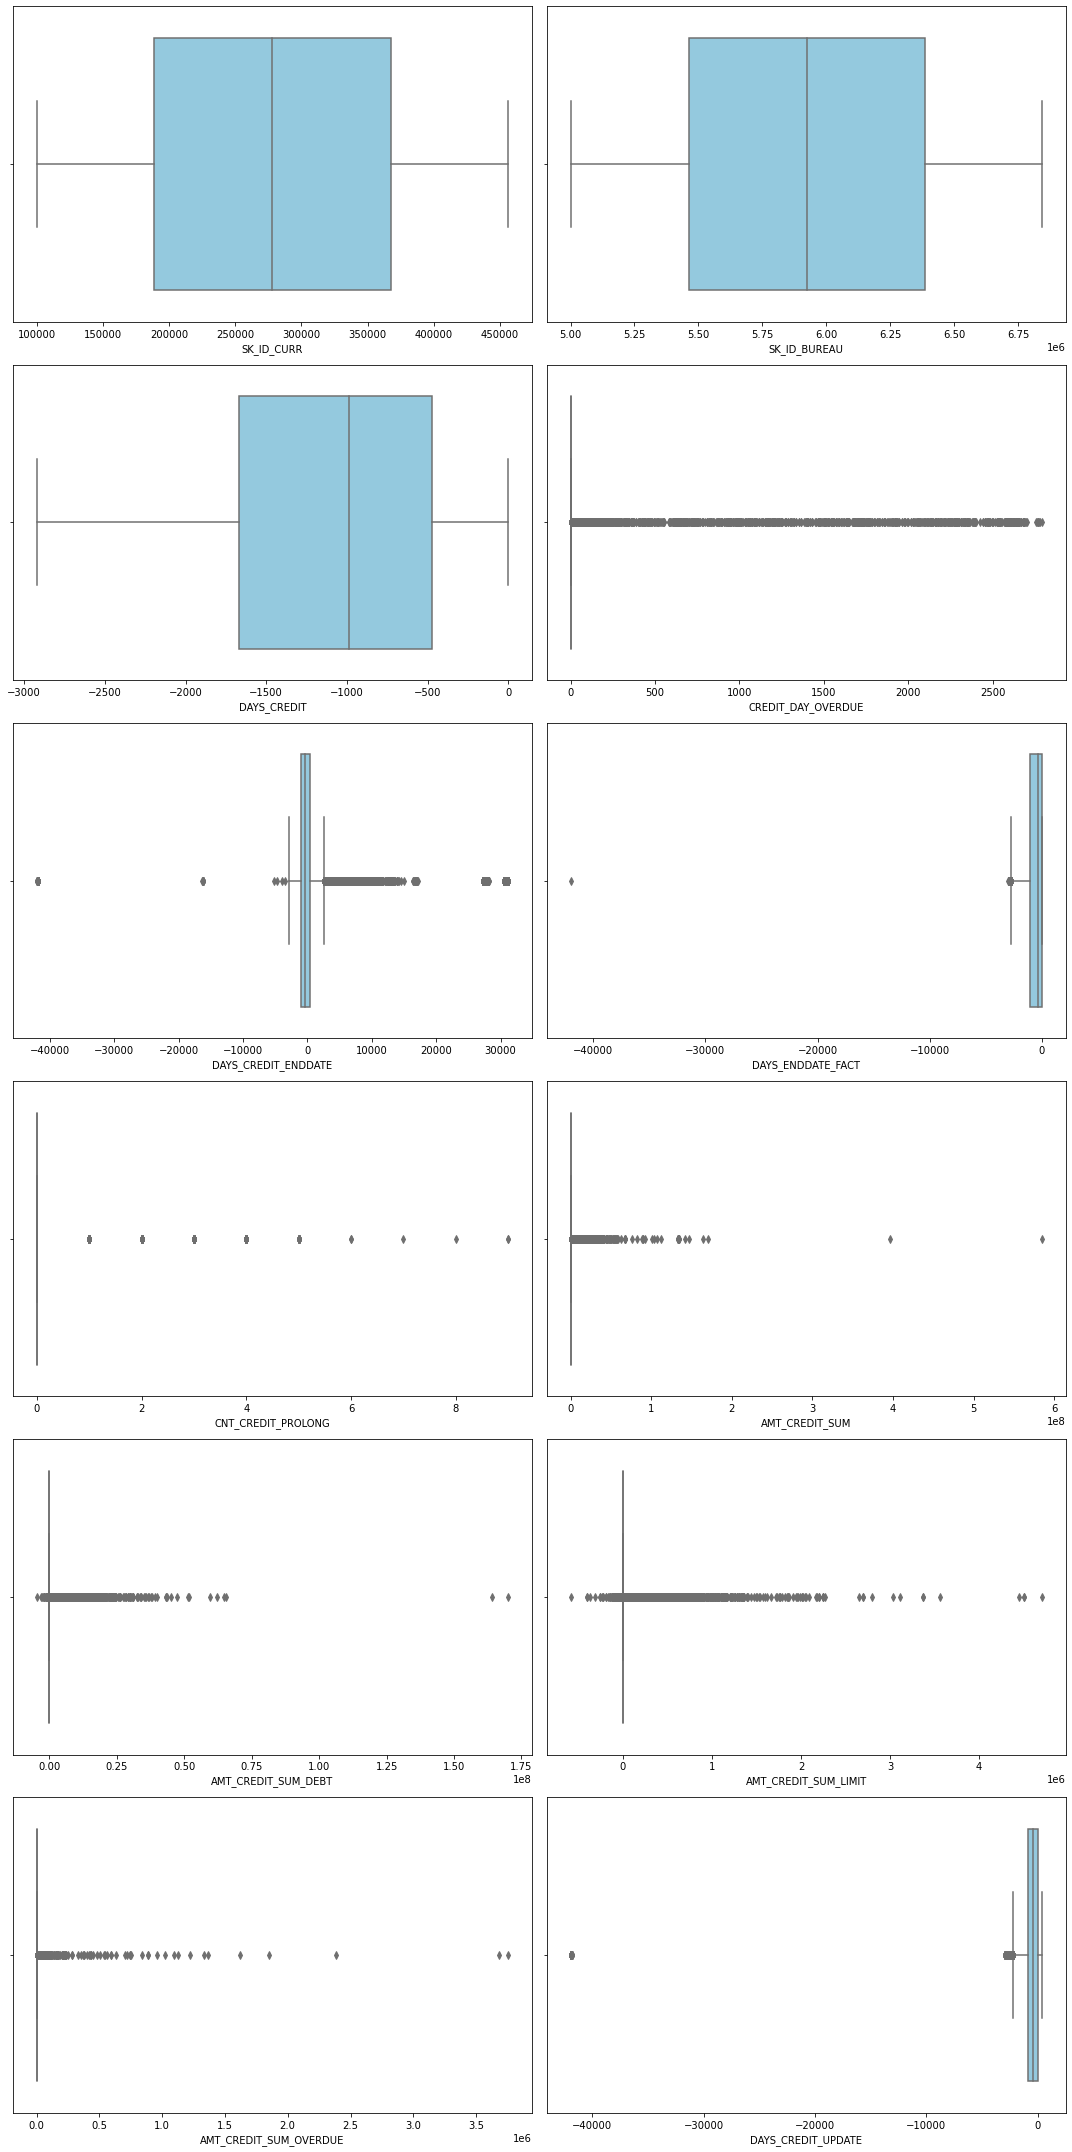

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

features = numerical
num_plots = len(features)
num_columns = 2  # Jumlah plot per baris
num_rows = math.ceil(num_plots / num_columns)  # Menghitung jumlah baris yang diperlukan

plt.figure(figsize=(15, 5*num_rows))  # Mengatur ukuran gambar sesuai jumlah baris

for i in range(num_plots):
    plt.subplot(num_rows, num_columns, i+1)
    sns.boxplot(x=bureau[features[i]], color='skyblue', orient='h')  # Mengatur orientasi menjadi horizontal
    plt.tight_layout()

plt.show()

In [9]:
import numpy as np

for col in bureau.columns:
    if bureau[col].dtype != 'object' and bureau[col].dtype != 'str' and bureau[col].dtype != 'bool' and bureau[col].dtype != 'category':
        if col != 'SK_ID_CURR' and col != 'TARGET' and col != 'SK_ID_BUREAU' and col != 'SK_ID_PREV':
            q25, q75 = np.percentile(bureau[col], 25), np.percentile(bureau[col], 75)
            iqr = q75 - q25
            # calculate the outlier cutoff
            cut_off = iqr * 1.5
            lower, upper = q25 - cut_off, q75 + cut_off
            # identify outliers
            outliers = bureau[(bureau[col] < lower) | (bureau[col] > upper)]
            print(f'Number of outliers in {col} column is {len(outliers)}')
            # remove outliers
            outliers_removed = bureau[(bureau[col] >= lower) & (bureau[col] <= upper)]
            bureau = outliers_removed
            print(f'Outlier removed bureau shape: {bureau.shape}')
            print('----------------------------------------------')


Number of outliers in DAYS_CREDIT column is 0
Outlier removed bureau shape: (1716428, 15)
----------------------------------------------
Number of outliers in CREDIT_DAY_OVERDUE column is 4217
Outlier removed bureau shape: (1712211, 15)
----------------------------------------------
Number of outliers in DAYS_CREDIT_ENDDATE column is 80566
Outlier removed bureau shape: (1631645, 15)
----------------------------------------------
Number of outliers in DAYS_ENDDATE_FACT column is 878
Outlier removed bureau shape: (1630767, 15)
----------------------------------------------
Number of outliers in CNT_CREDIT_PROLONG column is 4769
Outlier removed bureau shape: (1625998, 15)
----------------------------------------------
Number of outliers in AMT_CREDIT_SUM column is 175951
Outlier removed bureau shape: (1450047, 15)
----------------------------------------------
Number of outliers in AMT_CREDIT_SUM_DEBT column is 321840
Outlier removed bureau shape: (1128207, 15)
---------------------------

#### EDA Bureau

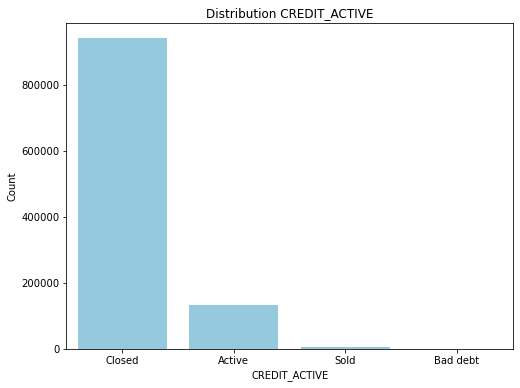

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(data=bureau, x='CREDIT_ACTIVE', color='skyblue')
plt.title('Distribution CREDIT_ACTIVE')
plt.xlabel('CREDIT_ACTIVE')
plt.ylabel('Count')
plt.show()

- Saat melihat Status kredit yang dilaporkan oleh Credit Bureau 'CREDIT_ACTIVE', terlihat bahwa status yang telah ditutup lebih banyak daripada yang masih aktif.

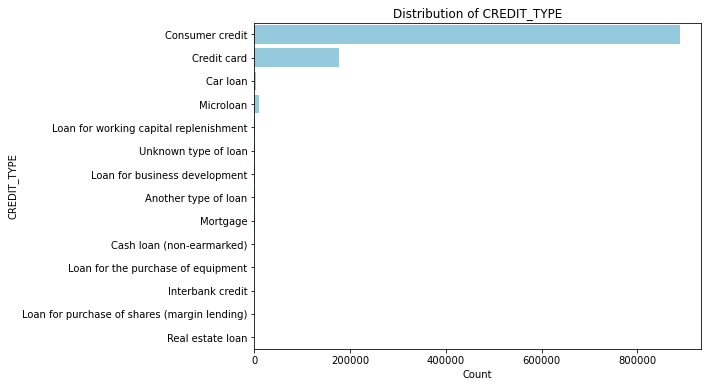

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(data=bureau, y='CREDIT_TYPE', color='skyblue')
plt.title('Distribution of CREDIT_TYPE')
plt.xlabel('Count')
plt.ylabel('CREDIT_TYPE')
plt.show()

- Kredit Consumer Credit dan Credit Card adalah jenis kredit yang paling sering diajukan di antara yang lain.

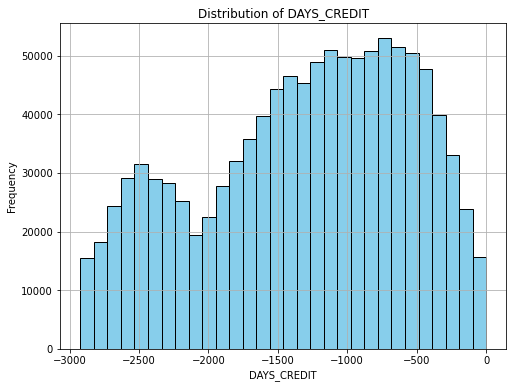

In [12]:
plt.figure(figsize=(8, 6))
plt.hist(bureau['DAYS_CREDIT'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of DAYS_CREDIT')
plt.xlabel('DAYS_CREDIT')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

- Grafik diatas merujuk pada jangka waktu dalam jumlah hari antara aplikasi klien 'DAYS_CREDIT' untuk kredit di Biro Kredit dengan tanggal saat aplikasi kredit saat ini diajukan. Klien-klien saat ini umumnya memiliki sejarah pengajuan kredit yang berdekatan dengan pengajuan kredit terkini.

### Bureau Balance Dataset

#### Import Dataset

In [13]:
# Import Dataset 'bureau_balance'
bureau_balance = pd.read_csv('bureau_balance.csv')
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


#### Handling Duplicate Value

In [14]:
# Cheking shape
print('bureau_balance shape =', bureau.shape)

bureau_balance shape = (1079133, 15)


In [15]:
# Cheking duplicate value

print('bureau_balance duplicated = ', bureau.duplicated().sum())

bureau_balance duplicated =  0


#### Handling Missing Value

In [16]:
# checking persentage missing value 
total_null = pd.DataFrame(bureau_balance.isnull().sum(),columns=['Total_Null_Values'])
total_null['Percentage'] = (total_null['Total_Null_Values']/bureau_balance.shape[0])*100
total_null = total_null.sort_values(by='Percentage', ascending=False).reset_index()
total_null

,index,Total_Null_Values,Percentage
0,SK_ID_BUREAU,0,0.0
1,MONTHS_BALANCE,0,0.0
2,STATUS,0,0.0


#### Handling Outliers

In [17]:
# Separated Colums base on data type
num_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_df = bureau_balance.select_dtypes(include=num_dtypes)
numerical = num_df.columns

cat_dtypes = ['object']
cat_df = bureau_balance.select_dtypes(include=cat_dtypes)
categorical = cat_df.columns

print('numerical columns =', numerical)
print('categorical columns =', categorical)

numerical columns = Index(['SK_ID_BUREAU', 'MONTHS_BALANCE'], dtype='object')
categorical columns = Index(['STATUS'], dtype='object')


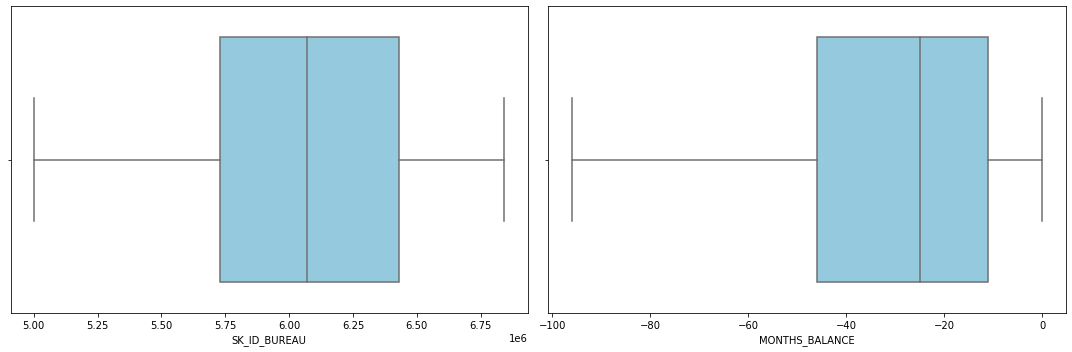

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

features = numerical
num_plots = len(features)
num_columns = 2  # Jumlah plot per baris
num_rows = math.ceil(num_plots / num_columns)  # Menghitung jumlah baris yang diperlukan

plt.figure(figsize=(15, 5*num_rows))  # Mengatur ukuran gambar sesuai jumlah baris

for i in range(num_plots):
    plt.subplot(num_rows, num_columns, i+1)
    sns.boxplot(x=bureau_balance[features[i]], color='skyblue', orient='h')  # Mengatur orientasi menjadi horizontal
    plt.tight_layout()

plt.show()

#### EDA Bureau Balance

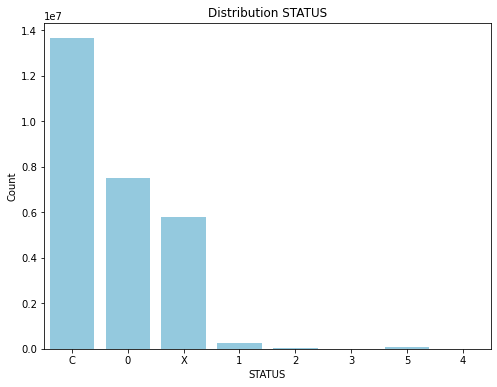

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(data=bureau_balance, x='STATUS', color='skyblue')
plt.title('Distribution STATUS')
plt.xlabel('STATUS')
plt.ylabel('Count')
plt.show()

- Status of Credit Bureau loan during the month (active, closed, DPD0-30,… [C means closed, X means status unknown, 0 means no DPD, 1 means maximal did during month between 1-30, 2 means DPD 31-60,… 5 means DPD 120+ or sold or written off ])

In [20]:
# Agregation 'MONTHS_BALANCE' base on 'SK_ID_BUREAU' with mean
beaureau_balance_agg = bureau_balance.groupby('SK_ID_BUREAU')['MONTHS_BALANCE'].mean().reset_index()
beaureau_balance_agg.columns = ['SK_ID_BUREAU', 'MONTHS_BALANCE_MEAN']
beaureau_balance_agg.head()

,SK_ID_BUREAU,MONTHS_BALANCE_MEAN
0,5001709,-48.0
1,5001710,-41.0
2,5001711,-1.5
3,5001712,-9.0
4,5001713,-10.5


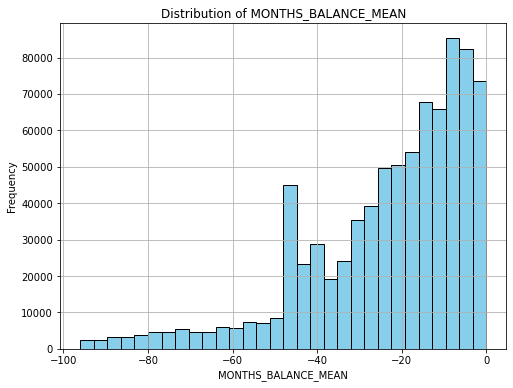

In [21]:
plt.figure(figsize=(8, 6))
plt.hist(beaureau_balance_agg['MONTHS_BALANCE_MEAN'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of MONTHS_BALANCE_MEAN')
plt.xlabel('MONTHS_BALANCE_MEAN')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

- MONTHS_BALANCE_MEAN relatif terhadap tanggal aplikasi (-1 artinya tanggal saldo terbaru). Ini menggambarkan bulan saldo terbaru dalam hubungannya dengan tanggal aplikasi terkini. Terlihat bahwa sebagian besar saldo hampir baru.

### Bureau X Bureau Balance

#### Join Tabel

In [22]:
bureau2 = bureau.merge(beaureau_balance_agg, on='SK_ID_BUREAU', how='inner')
bureau2.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,MONTHS_BALANCE_MEAN
0,380361,5715451,Closed,currency 1,-917,0,-187.0,-759.0,0,74439.0,0.0,0.0,0.0,Consumer credit,-748,-17.5
1,380361,5715454,Closed,currency 1,-1622,0,-1074.0,-1073.0,0,540000.0,0.0,0.0,0.0,Consumer credit,-1006,-34.0
2,380361,5715456,Closed,currency 1,-1449,0,-1084.0,-1267.0,0,60480.0,0.0,0.0,0.0,Consumer credit,-1259,-34.0
3,380361,5715460,Active,currency 1,-233,0,498.0,0.0,0,168525.0,0.0,0.0,0.0,Consumer credit,-16,-3.5
4,275240,5715470,Closed,currency 1,-2341,0,-1974.0,-1974.0,0,112500.0,0.0,0.0,0.0,Consumer credit,-1496,-38.0


In [23]:
bureau2.shape

(484816, 16)

#### Agregate Tabel

In [24]:
bureau_merge_agg = bureau2.groupby('SK_ID_CURR').agg({ 'DAYS_CREDIT': 'mean',
                                                       'AMT_CREDIT_SUM': 'mean',
                                                       'AMT_CREDIT_SUM_DEBT': 'mean'})

# Change 'bureau_merge_agg' columns name
bureau_merge_agg.columns = ['DAYS_CREDIT_MEAN', 'AMT_CREDIT_SUM_MEAN', 'AMT_CREDIT_SUM_DEBT_MEAN']
bureau_merge_agg.head()

,DAYS_CREDIT_MEAN,AMT_CREDIT_SUM_MEAN,AMT_CREDIT_SUM_DEBT_MEAN
SK_ID_CURR,,,
100001,-1054.25,142335.00,0.0
100002,-974.50,63844.50,0.0
100005,-373.00,58500.00,0.0
100010,-2741.00,315000.00,0.0
100013,-1640.00,60765.03,0.0


#### EDA Bureau X Bureau Balance

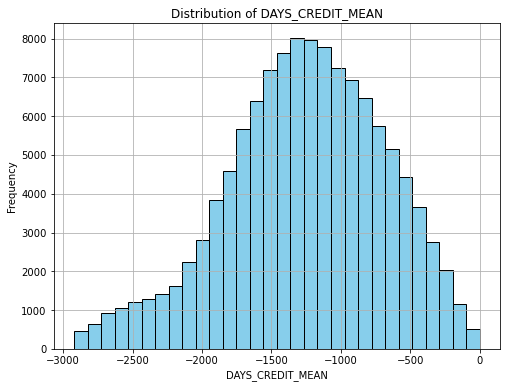

In [25]:
plt.figure(figsize=(8, 6))
plt.hist(bureau_merge_agg['DAYS_CREDIT_MEAN'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of DAYS_CREDIT_MEAN')
plt.xlabel('DAYS_CREDIT_MEAN')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

- Grafik diatas merujuk pada jangka waktu dalam jumlah hari antara aplikasi klien 'DAYS_CREDIT_MEAN' untuk kredit di Biro Kredit dengan tanggal saat aplikasi kredit saat ini diajukan. Ini menggambarkan seberapa jauh mundurnya riwayat aplikasi kredit seorang klien dari aplikasi kredit terkini yang sedang diproses. Klien-klien saat ini umumnya memiliki rata-rata sejarah pengajuan kredit yang berdekatan dengan pengajuan kredit terkini.

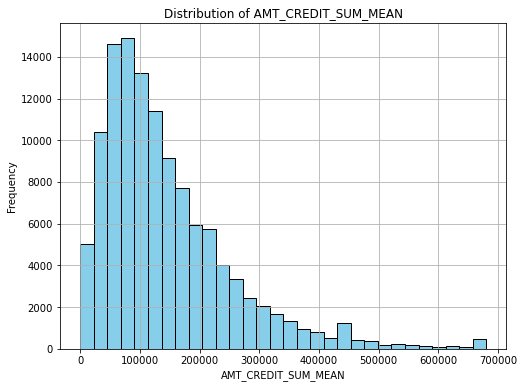

In [26]:
plt.figure(figsize=(8, 6))
plt.hist(bureau_merge_agg['AMT_CREDIT_SUM_MEAN'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of AMT_CREDIT_SUM_MEAN')
plt.xlabel('AMT_CREDIT_SUM_MEAN')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

- Grafik tersebut menggambarkan rata-rata jumlah saldo 'AMT_CREDIT_SUM' pada kredit dari Biro Kredit setelah diagregasi melalui nilai MEAN. Tampak bahwa, secara umum, rata-rata saldo yang diajukan lebih rendah bagi sebagian besar pemohon kredit.

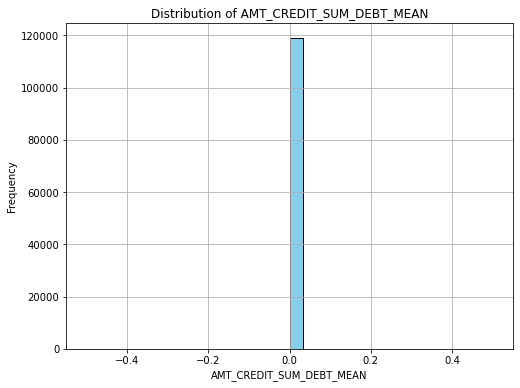

In [27]:
plt.figure(figsize=(8, 6))
plt.hist(bureau_merge_agg['AMT_CREDIT_SUM_DEBT_MEAN'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of AMT_CREDIT_SUM_DEBT_MEAN')
plt.xlabel('AMT_CREDIT_SUM_DEBT_MEAN')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

- Grafik diatas menggambarkan rata-rata Jumlah kredit 'AMT_CREDIT_SUM_DEBT_MEAN' saat ini untuk kredit Biro Kredit  setelah proses agregasi dengan menggunakan MEAN.

### Credit Card Balance Dataset

#### Import Dataset

In [28]:
# Import Dataset 'credit_card_balance'
credit_card_balance = pd.read_csv('credit_card_balance.csv')

#### Handling Duplicate Value

In [29]:
# Cheking shape
print('credit_card_balance shape =', credit_card_balance.shape)

credit_card_balance shape = (3840312, 23)


In [30]:
# Cheking duplicate value

print('credit_card_balance duplicated = ', credit_card_balance.duplicated().sum())

credit_card_balance duplicated =  0


#### Handling Missing Value

In [31]:
# checking persentage missing value 
total_null = pd.DataFrame(credit_card_balance.isnull().sum(),columns=['Total_Null_Values'])
total_null['Percentage'] = (total_null['Total_Null_Values']/credit_card_balance.shape[0])*100
total_null = total_null.sort_values(by='Percentage', ascending=False).reset_index()
total_null

,index,Total_Null_Values,Percentage
0,AMT_PAYMENT_CURRENT,767988,19.998063
1,AMT_DRAWINGS_ATM_CURRENT,749816,19.524872
2,CNT_DRAWINGS_POS_CURRENT,749816,19.524872
3,AMT_DRAWINGS_OTHER_CURRENT,749816,19.524872
4,AMT_DRAWINGS_POS_CURRENT,749816,19.524872
5,CNT_DRAWINGS_OTHER_CURRENT,749816,19.524872
6,CNT_DRAWINGS_ATM_CURRENT,749816,19.524872
7,CNT_INSTALMENT_MATURE_CUM,305236,7.948208
8,AMT_INST_MIN_REGULARITY,305236,7.948208
9,SK_ID_PREV,0,0.000000


In [32]:
# Filled Missing Value 
credit_card_balance['AMT_PAYMENT_CURRENT'].fillna(credit_card_balance['AMT_PAYMENT_CURRENT'].median(), inplace=True)
credit_card_balance['AMT_DRAWINGS_ATM_CURRENT'].fillna(credit_card_balance['AMT_DRAWINGS_ATM_CURRENT'].median(), inplace=True)
credit_card_balance['CNT_DRAWINGS_POS_CURRENT'].fillna(credit_card_balance['CNT_DRAWINGS_POS_CURRENT'].median(), inplace=True)
credit_card_balance['AMT_DRAWINGS_OTHER_CURRENT'].fillna(credit_card_balance['AMT_DRAWINGS_OTHER_CURRENT'].median(), inplace=True)
credit_card_balance['AMT_DRAWINGS_POS_CURRENT'].fillna(credit_card_balance['AMT_DRAWINGS_POS_CURRENT'].median(), inplace=True)
credit_card_balance['CNT_DRAWINGS_OTHER_CURRENT'].fillna(credit_card_balance['CNT_DRAWINGS_OTHER_CURRENT'].median(), inplace=True)
credit_card_balance['CNT_DRAWINGS_ATM_CURRENT'].fillna(credit_card_balance['CNT_DRAWINGS_ATM_CURRENT'].median(), inplace=True)
credit_card_balance['CNT_INSTALMENT_MATURE_CUM'].fillna(credit_card_balance['CNT_INSTALMENT_MATURE_CUM'].median(), inplace=True)
credit_card_balance['AMT_INST_MIN_REGULARITY'].fillna(credit_card_balance['AMT_INST_MIN_REGULARITY'].median(), inplace=True)

# checking persentage missing value 
total_null = pd.DataFrame(credit_card_balance.isnull().sum(),columns=['Total_Null_Values'])
total_null['Percentage'] = (total_null['Total_Null_Values']/credit_card_balance.shape[0])*100
total_null = total_null.sort_values(by='Percentage', ascending=False).reset_index()
total_null

,index,Total_Null_Values,Percentage
0,SK_ID_PREV,0,0.0
1,AMT_RECEIVABLE_PRINCIPAL,0,0.0
2,SK_DPD,0,0.0
3,NAME_CONTRACT_STATUS,0,0.0
4,CNT_INSTALMENT_MATURE_CUM,0,0.0
5,CNT_DRAWINGS_POS_CURRENT,0,0.0
6,CNT_DRAWINGS_OTHER_CURRENT,0,0.0
7,CNT_DRAWINGS_CURRENT,0,0.0
8,CNT_DRAWINGS_ATM_CURRENT,0,0.0
9,AMT_TOTAL_RECEIVABLE,0,0.0


#### Handling Outliers

In [33]:
# Separated Colums base on data type
num_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_df = credit_card_balance.select_dtypes(include=num_dtypes)
numerical = num_df.columns

cat_dtypes = ['object']
cat_df = credit_card_balance.select_dtypes(include=cat_dtypes)
categorical = cat_df.columns

print('numerical columns =', numerical)
print('categorical columns =', categorical)

numerical columns = Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'SK_DPD', 'SK_DPD_DEF'],
      dtype='object')
categorical columns = Index(['NAME_CONTRACT_STATUS'], dtype='object')


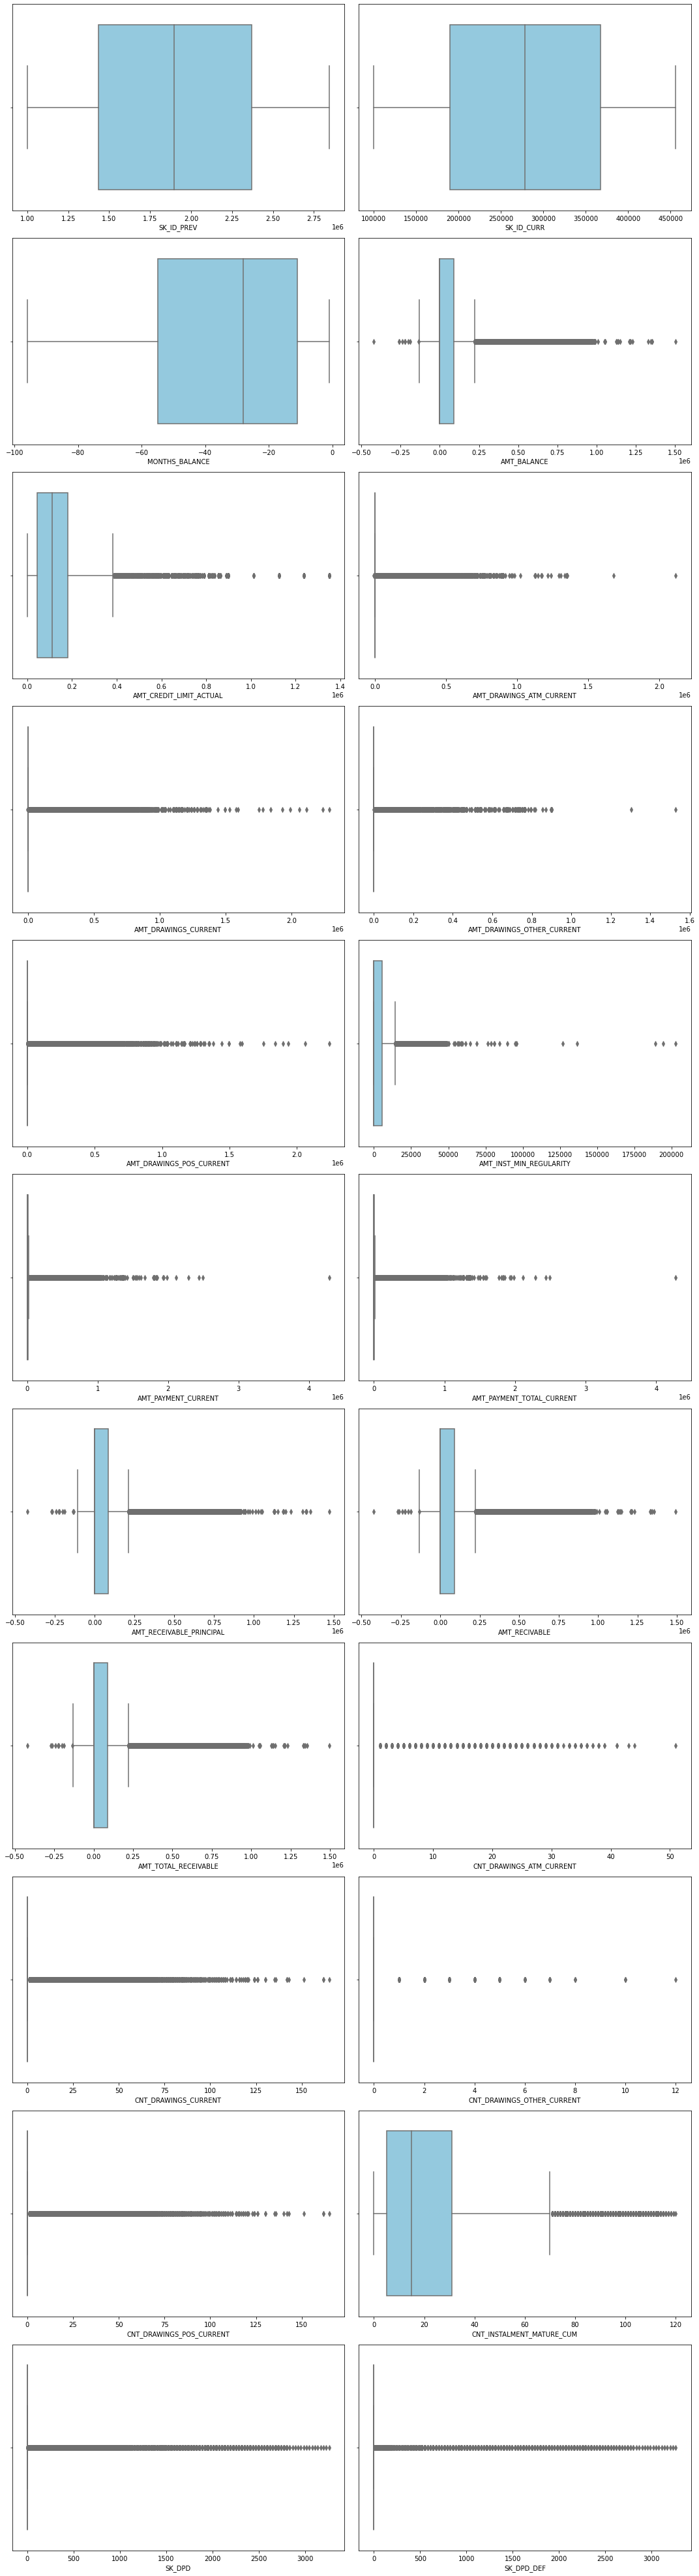

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

features = numerical
num_plots = len(features)
num_columns = 2  # Jumlah plot per baris
num_rows = math.ceil(num_plots / num_columns)  # Menghitung jumlah baris yang diperlukan

plt.figure(figsize=(15, 5*num_rows))  # Mengatur ukuran gambar sesuai jumlah baris

for i in range(num_plots):
    plt.subplot(num_rows, num_columns, i+1)
    sns.boxplot(x=credit_card_balance[features[i]], color='skyblue', orient='h')  # Mengatur orientasi menjadi horizontal
    plt.tight_layout()

plt.show()

In [35]:
for col in numerical:
    q25, q75 = np.percentile(credit_card_balance[col], 25), np.percentile(credit_card_balance[col], 75)
    iqr = q75 - q25
    # Hitung outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # Identifikasi outliers
    outliers = credit_card_balance[(credit_card_balance[col] < lower) | (credit_card_balance[col] > upper)]
    print(f'Number of outliers in {col} column is {len(outliers)}')
    # Hapus outliers
    outliers_removed = credit_card_balance[(credit_card_balance[col] >= lower) & (credit_card_balance[col] <= upper)]
    credit_card_balance = outliers_removed
    print(f'Outlier removed credit_card_balance shape: {credit_card_balance.shape}')
    print('----------------------------------------------')

Number of outliers in SK_ID_PREV column is 0
Outlier removed credit_card_balance shape: (3840312, 23)
----------------------------------------------
Number of outliers in SK_ID_CURR column is 0
Outlier removed credit_card_balance shape: (3840312, 23)
----------------------------------------------
Number of outliers in MONTHS_BALANCE column is 0
Outlier removed credit_card_balance shape: (3840312, 23)
----------------------------------------------
Number of outliers in AMT_BALANCE column is 248146
Outlier removed credit_card_balance shape: (3592166, 23)
----------------------------------------------
Number of outliers in AMT_CREDIT_LIMIT_ACTUAL column is 259147
Outlier removed credit_card_balance shape: (3333019, 23)
----------------------------------------------
Number of outliers in AMT_DRAWINGS_ATM_CURRENT column is 293161
Outlier removed credit_card_balance shape: (3039858, 23)
----------------------------------------------
Number of outliers in AMT_DRAWINGS_CURRENT column is 119651

#### EDA  Credit Card Balance

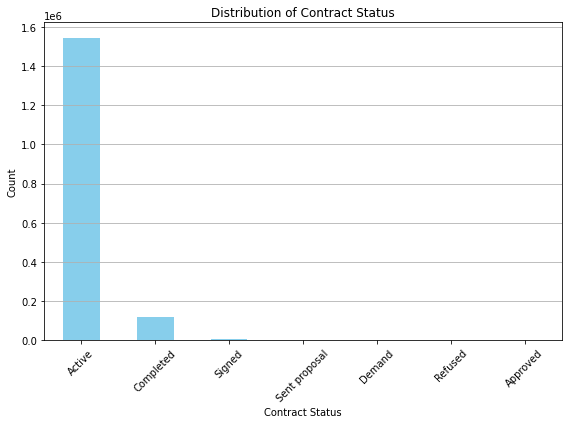

In [36]:
import matplotlib.pyplot as plt

# Agregation on 'NAME_CONTRACT_STATUS' using COUNT
contract_status_counts = credit_card_balance['NAME_CONTRACT_STATUS'].value_counts()

# Plot bar 'NAME_CONTRACT_STATUS'
plt.figure(figsize=(8, 6))
contract_status_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Contract Status')
plt.xlabel('Contract Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



-  Dari plot diatas, dapat diamati bahwa status 'NAME_CONTRACT_STATUS' yang paling dominan adalah "Active" (Aktif). Ini menunjukkan bahwa mayoritas kredit sebelumnya masih dalam status aktif.

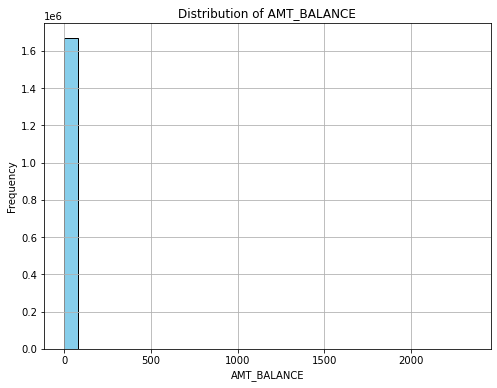

In [37]:
plt.figure(figsize=(8, 6))
plt.hist(credit_card_balance['AMT_BALANCE'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of AMT_BALANCE')
plt.xlabel('AMT_BALANCE')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

- Dari plot diatas, mengindikasikan bahwa saldo selama bulan kredit sebelumnya 'AMT_BALANCE', sebagian besar dari saldo tersebut berada pada nilai 0 selama bulan kredit sebelumnya.

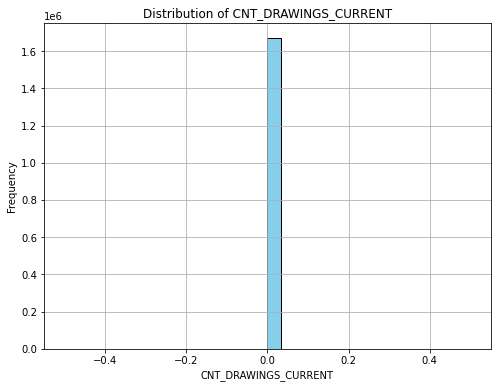

In [38]:
plt.figure(figsize=(8, 6))
plt.hist(credit_card_balance['CNT_DRAWINGS_CURRENT'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of CNT_DRAWINGS_CURRENT')
plt.xlabel('CNT_DRAWINGS_CURRENT')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

- Plot diatas menunjukan jumlah pengambilan uang untuk semua entitas 'CNT_DRAWINGS_CURRENT' adalah 0. Ini mengindikasikan bahwa tidak ada pengambilan uang yang tercatat pada bulan ini pada kredit sebelumnya untuk semua entitas yang diamati dalam data tersebut.

In [39]:
# Agregation Using Mean
payment_mean = credit_card_balance.groupby('SK_ID_CURR')[['AMT_PAYMENT_CURRENT', 'AMT_CREDIT_LIMIT_ACTUAL']].mean().reset_index()

df_payment_mean = pd.DataFrame(payment_mean, columns=['SK_ID_CURR', 'AMT_PAYMENT_CURRENT', 'AMT_CREDIT_LIMIT_ACTUAL'])
df_payment_mean.head()

,SK_ID_CURR,AMT_PAYMENT_CURRENT,AMT_CREDIT_LIMIT_ACTUAL
0,100006,2702.700000,270000.000000
1,100011,563.355000,148378.378378
2,100013,364.905662,121102.941176
3,100023,2702.700000,135000.000000
4,100028,2702.700000,225000.000000


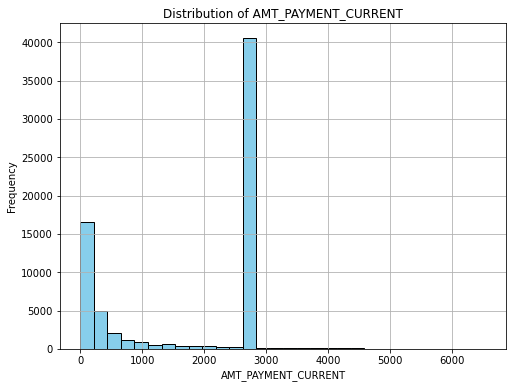

In [40]:
plt.figure(figsize=(8, 6))
plt.hist(df_payment_mean['AMT_PAYMENT_CURRENT'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of AMT_PAYMENT_CURRENT')
plt.xlabel('AMT_PAYMENT_CURRENT')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

- Setelah dilakukan agregasi, informasi tentang seberapa besar klien membayar selama bulan pada kredit sebelumnya 'AMT_PAYMENT_CURRENT' menunjukkan bahwa sebagian besar pembayaran berada di bawah 3000, dan lonjakan terbesar berada pada angka 2800-2900

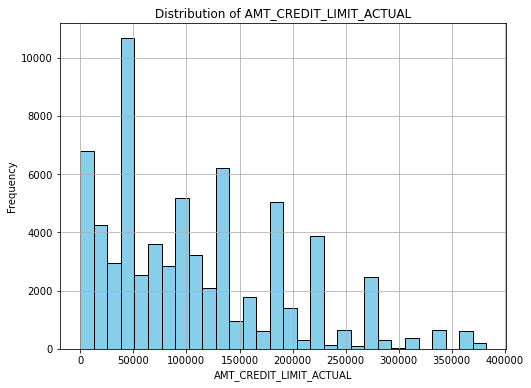

In [41]:
plt.figure(figsize=(8, 6))
plt.hist(df_payment_mean['AMT_CREDIT_LIMIT_ACTUAL'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of AMT_CREDIT_LIMIT_ACTUAL')
plt.xlabel('AMT_CREDIT_LIMIT_ACTUAL')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

- Grafik hasil aggregasi tersebut menunjukkan bahwa mayoritas dari nilai rata-rata limit kredit 'AMT_CREDIT_LIMIT_ACTUAL' berada pada rentang yang kurang dari 150.000.

### Instal Payment Dataset

#### Import Dataset

In [42]:
# Import Dataset 'berau'
installments_payments = pd.read_csv('installments_payments.csv')
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


#### Handling Duplicate Value

In [43]:
# Cheking shape
print('installments_payments shape =', bureau.shape)

installments_payments shape = (1079133, 15)


In [44]:
# Cheking duplicate value

print('installments_payments duplicated = ', bureau.duplicated().sum())

installments_payments duplicated =  0


#### Handling Missing Value

In [45]:
# checking persentage missing value 
total_null = pd.DataFrame(installments_payments.isnull().sum(),columns=['Total_Null_Values'])
total_null['Percentage'] = (total_null['Total_Null_Values']/installments_payments.shape[0])*100
total_null = total_null.sort_values(by='Percentage', ascending=False).reset_index()
total_null

,index,Total_Null_Values,Percentage
0,DAYS_ENTRY_PAYMENT,2905,0.021352
1,AMT_PAYMENT,2905,0.021352
2,SK_ID_PREV,0,0.000000
3,SK_ID_CURR,0,0.000000
4,NUM_INSTALMENT_VERSION,0,0.000000
5,NUM_INSTALMENT_NUMBER,0,0.000000
6,DAYS_INSTALMENT,0,0.000000
7,AMT_INSTALMENT,0,0.000000


In [46]:
# Filled Missing Value 
installments_payments['DAYS_ENTRY_PAYMENT'].fillna(installments_payments['DAYS_ENTRY_PAYMENT'].median(), inplace=True)
installments_payments['AMT_PAYMENT'].fillna(installments_payments['AMT_PAYMENT'].median(), inplace=True)

# checking persentage missing value 
total_null = pd.DataFrame(installments_payments.isnull().sum(),columns=['Total_Null_Values'])
total_null['Percentage'] = (total_null['Total_Null_Values']/installments_payments.shape[0])*100
total_null = total_null.sort_values(by='Percentage', ascending=False).reset_index()
total_null

,index,Total_Null_Values,Percentage
0,SK_ID_PREV,0,0.0
1,SK_ID_CURR,0,0.0
2,NUM_INSTALMENT_VERSION,0,0.0
3,NUM_INSTALMENT_NUMBER,0,0.0
4,DAYS_INSTALMENT,0,0.0
5,DAYS_ENTRY_PAYMENT,0,0.0
6,AMT_INSTALMENT,0,0.0
7,AMT_PAYMENT,0,0.0


#### Handling Outliers

In [47]:
# Separated Colums base on data type
num_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_df = installments_payments.select_dtypes(include=num_dtypes)
numerical = num_df.columns

cat_dtypes = ['object']
cat_df = installments_payments.select_dtypes(include=cat_dtypes)
categorical = cat_df.columns

print('numerical columns =', numerical)
print('categorical columns =', categorical)

numerical columns = Index(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT'],
      dtype='object')
categorical columns = Index([], dtype='object')


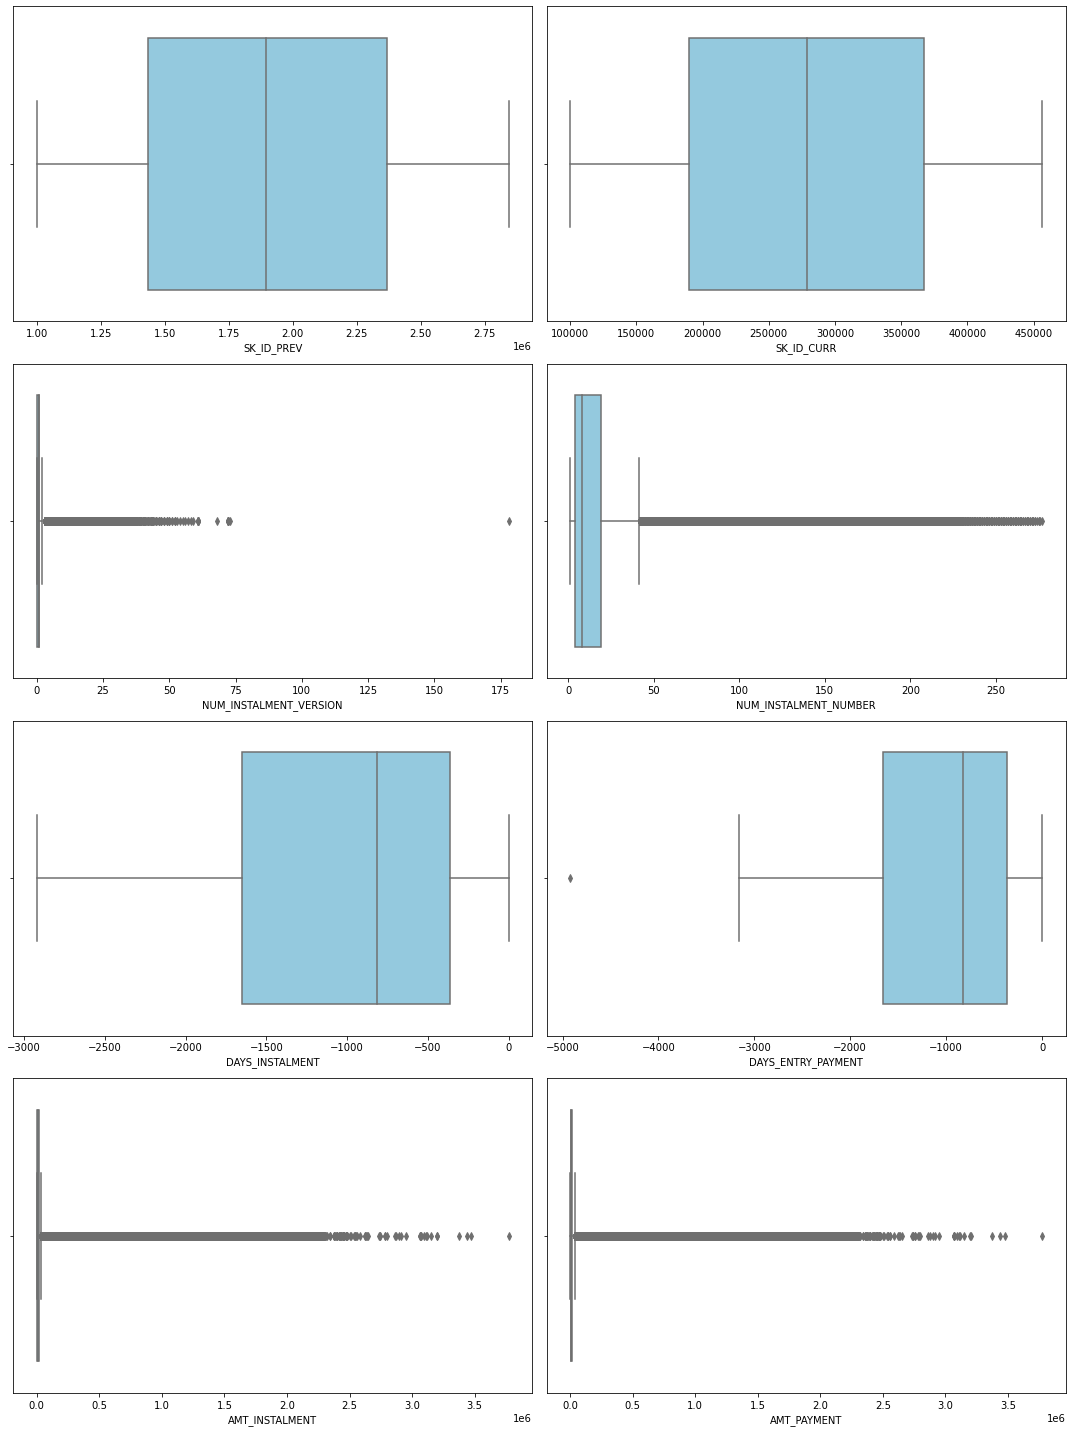

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

features = numerical
num_plots = len(features)
num_columns = 2  # Jumlah plot per baris
num_rows = math.ceil(num_plots / num_columns)  # Menghitung jumlah baris yang diperlukan

plt.figure(figsize=(15, 5*num_rows))  # Mengatur ukuran gambar sesuai jumlah baris

for i in range(num_plots):
    plt.subplot(num_rows, num_columns, i+1)
    sns.boxplot(x=installments_payments[features[i]], color='skyblue', orient='h')  # Mengatur orientasi menjadi horizontal
    plt.tight_layout()

plt.show()

In [49]:
for col in numerical:
    q25, q75 = np.percentile(installments_payments[col], 25), np.percentile(installments_payments[col], 75)
    iqr = q75 - q25
    # Hitung outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # Identifikasi outliers
    outliers = installments_payments[(installments_payments[col] < lower) | (installments_payments[col] > upper)]
    print(f'Number of outliers in {col} column is {len(outliers)}')
    # Hapus outliers
    outliers_removed = installments_payments[(installments_payments[col] >= lower) & (installments_payments[col] <= upper)]
    installments_payments = outliers_removed
    print(f'Outlier removed installments_payments shape: {installments_payments.shape}')
    print('----------------------------------------------')

Number of outliers in SK_ID_PREV column is 0
Outlier removed installments_payments shape: (13605401, 8)
----------------------------------------------
Number of outliers in SK_ID_CURR column is 0
Outlier removed installments_payments shape: (13605401, 8)
----------------------------------------------
Number of outliers in NUM_INSTALMENT_VERSION column is 417616
Outlier removed installments_payments shape: (13187785, 8)
----------------------------------------------
Number of outliers in NUM_INSTALMENT_NUMBER column is 1760055
Outlier removed installments_payments shape: (11427730, 8)
----------------------------------------------
Number of outliers in DAYS_INSTALMENT column is 0
Outlier removed installments_payments shape: (11427730, 8)
----------------------------------------------
Number of outliers in DAYS_ENTRY_PAYMENT column is 0
Outlier removed installments_payments shape: (11427730, 8)
----------------------------------------------
Number of outliers in AMT_INSTALMENT column is 

#### EDA Instal Payment

In [50]:
# Agregation Using Mean
installments_payments_mean = installments_payments.groupby('SK_ID_CURR')[['AMT_INSTALMENT', 'AMT_PAYMENT']].mean().reset_index()

df_installments_payments_mean = pd.DataFrame(installments_payments_mean, columns=['SK_ID_CURR', 'AMT_INSTALMENT', 'AMT_PAYMENT'])
df_installments_payments_mean.head()

,SK_ID_CURR,AMT_INSTALMENT,AMT_PAYMENT
0,100001,5885.132143,5885.132143
1,100002,9251.775000,9251.775000
2,100003,6731.115000,6731.115000
3,100004,7096.155000,7096.155000
4,100005,6240.205000,6240.205000


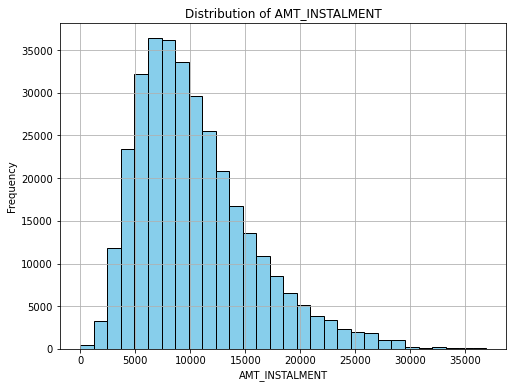

In [51]:
plt.figure(figsize=(8, 6))
plt.hist(df_installments_payments_mean['AMT_INSTALMENT'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of AMT_INSTALMENT')
plt.xlabel('AMT_INSTALMENT')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

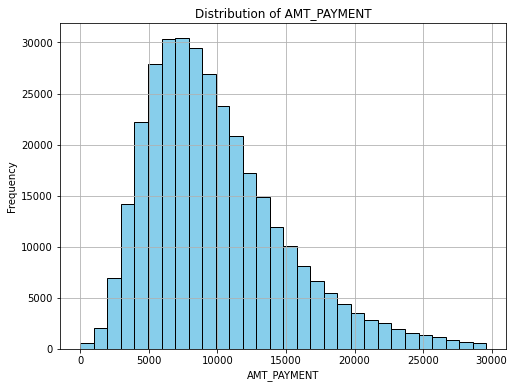

In [52]:
plt.figure(figsize=(8, 6))
plt.hist(df_installments_payments_mean['AMT_PAYMENT'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of AMT_PAYMENT')
plt.xlabel('AMT_PAYMENT')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

- Kedua kolom ini berkaitan dengan informasi tentang pembayaran kredit sebelumnya. AMT_INSTALMENT memberikan informasi tentang jumlah yang seharusnya dibayarkan dalam angsuran, sedangkan AMT_PAYMENT memberikan informasi tentang jumlah yang benar-benar dibayarkan oleh klien untuk angsuran tersebut. Dengan membandingkan kedua nilai ini, kita dapat melihat apakah klien membayar sesuai dengan jumlah yang ditetapkan atau mungkin lebih atau kurang dari jumlah yang seharusnya dibayarkan. Ini memberikan wawasan tentang kinerja pembayaran klien terhadap kredit yang dimilikinya.
- Menunjukkan bahwa klien tidak membayar jumlah yang seharusnya dibayarkan menurut perjanjian angsuran pada frekuensi tersebut. Hal ini dapat mengindikasikan keterlambatan pembayaran, pembayaran yang kurang dari yang seharusnya, atau bahkan pembayaran yang lebih besar dari yang seharusnya tergantung pada perbedaan antara AMT_PAYMENT dan AMT_INSTALMENT pada frekuensi.

### POS Cash Balance Dataset

#### Import Dataset

In [53]:
# Import Dataset 'POS_CASH_balance'
POS_CASH_balance = pd.read_csv('POS_CASH_balance.csv')
POS_CASH_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


#### Handling Duplicate Value

In [54]:
# Cheking shape
print('POS_CASH_balance shape =', POS_CASH_balance.shape)

POS_CASH_balance shape = (10001358, 8)


In [55]:
# Cheking duplicate value

print('POS_CASH_balance duplicated = ', POS_CASH_balance.duplicated().sum())

POS_CASH_balance duplicated =  0


#### Handling Missing Value

In [56]:
# checking persentage missing value 
total_null = pd.DataFrame(POS_CASH_balance.isnull().sum(),columns=['Total_Null_Values'])
total_null['Percentage'] = (total_null['Total_Null_Values']/POS_CASH_balance.shape[0])*100
total_null = total_null.sort_values(by='Percentage', ascending=False).reset_index()
total_null

,index,Total_Null_Values,Percentage
0,CNT_INSTALMENT_FUTURE,26087,0.260835
1,CNT_INSTALMENT,26071,0.260675
2,SK_ID_PREV,0,0.000000
3,SK_ID_CURR,0,0.000000
4,MONTHS_BALANCE,0,0.000000
5,NAME_CONTRACT_STATUS,0,0.000000
6,SK_DPD,0,0.000000
7,SK_DPD_DEF,0,0.000000


In [57]:
# Filled Missing Value 
POS_CASH_balance['CNT_INSTALMENT_FUTURE'].fillna(POS_CASH_balance['CNT_INSTALMENT_FUTURE'].median(), inplace=True)
POS_CASH_balance['CNT_INSTALMENT'].fillna(POS_CASH_balance['CNT_INSTALMENT'].median(), inplace=True)

# checking persentage missing value 
total_null = pd.DataFrame(POS_CASH_balance.isnull().sum(),columns=['Total_Null_Values'])
total_null['Percentage'] = (total_null['Total_Null_Values']/POS_CASH_balance.shape[0])*100
total_null = total_null.sort_values(by='Percentage', ascending=False).reset_index()
total_null

,index,Total_Null_Values,Percentage
0,SK_ID_PREV,0,0.0
1,SK_ID_CURR,0,0.0
2,MONTHS_BALANCE,0,0.0
3,CNT_INSTALMENT,0,0.0
4,CNT_INSTALMENT_FUTURE,0,0.0
5,NAME_CONTRACT_STATUS,0,0.0
6,SK_DPD,0,0.0
7,SK_DPD_DEF,0,0.0


#### Handling Outliers

In [58]:
# Separated Colums base on data type
num_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_df = POS_CASH_balance.select_dtypes(include=num_dtypes)
numerical = num_df.columns

cat_dtypes = ['object']
cat_df = POS_CASH_balance.select_dtypes(include=cat_dtypes)
categorical = cat_df.columns

print('numerical columns =', numerical)
print('categorical columns =', categorical)

numerical columns = Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'SK_DPD', 'SK_DPD_DEF'],
      dtype='object')
categorical columns = Index(['NAME_CONTRACT_STATUS'], dtype='object')


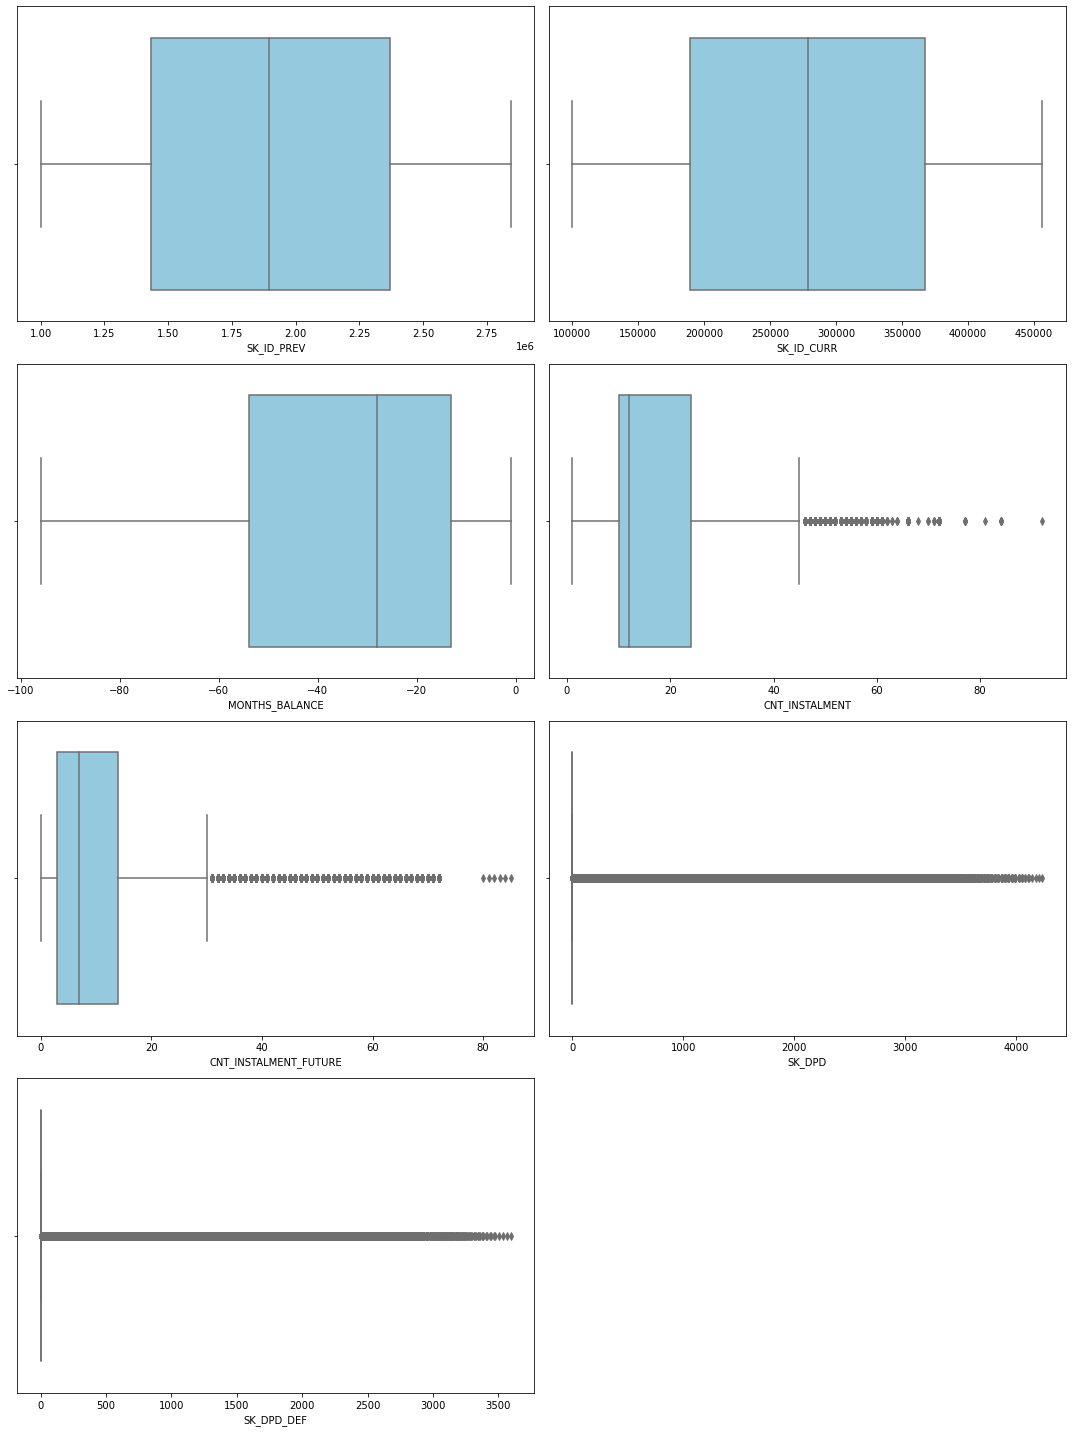

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

features = numerical
num_plots = len(features)
num_columns = 2  # Jumlah plot per baris
num_rows = math.ceil(num_plots / num_columns)  # Menghitung jumlah baris yang diperlukan

plt.figure(figsize=(15, 5*num_rows))  # Mengatur ukuran gambar sesuai jumlah baris

for i in range(num_plots):
    plt.subplot(num_rows, num_columns, i+1)
    sns.boxplot(x=POS_CASH_balance[features[i]], color='skyblue', orient='h')  # Mengatur orientasi menjadi horizontal
    plt.tight_layout()

plt.show()

In [60]:
for col in numerical:
    q25, q75 = np.percentile(POS_CASH_balance[col], 25), np.percentile(POS_CASH_balance[col], 75)
    iqr = q75 - q25
    # Hitung outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # Identifikasi outliers
    outliers = POS_CASH_balance[(POS_CASH_balance[col] < lower) | (POS_CASH_balance[col] > upper)]
    print(f'Number of outliers in {col} column is {len(outliers)}')
    # Hapus outliers
    outliers_removed = POS_CASH_balance[(POS_CASH_balance[col] >= lower) & (POS_CASH_balance[col] <= upper)]
    POS_CASH_balance = outliers_removed
    print(f'Outlier removed POS_CASH_balance shape: {POS_CASH_balance.shape}')
    print('----------------------------------------------')

Number of outliers in SK_ID_PREV column is 0
Outlier removed POS_CASH_balance shape: (10001358, 8)
----------------------------------------------
Number of outliers in SK_ID_CURR column is 0
Outlier removed POS_CASH_balance shape: (10001358, 8)
----------------------------------------------
Number of outliers in MONTHS_BALANCE column is 0
Outlier removed POS_CASH_balance shape: (10001358, 8)
----------------------------------------------
Number of outliers in CNT_INSTALMENT column is 498724
Outlier removed POS_CASH_balance shape: (9502634, 8)
----------------------------------------------
Number of outliers in CNT_INSTALMENT_FUTURE column is 479679
Outlier removed POS_CASH_balance shape: (9022955, 8)
----------------------------------------------
Number of outliers in SK_DPD column is 286175
Outlier removed POS_CASH_balance shape: (8736780, 8)
----------------------------------------------
Number of outliers in SK_DPD_DEF column is 0
Outlier removed POS_CASH_balance shape: (8736780, 8)

#### EDA Post Cash Balance

In [61]:
POS_CASH_balance.head(10)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
2,1784872,397406,-32,12.0,9.0,Active,0,0
5,2207092,342166,-32,12.0,12.0,Active,0,0
8,1220500,112740,-31,12.0,12.0,Active,0,0
9,2371489,274851,-32,24.0,16.0,Active,0,0
10,2328294,287361,-32,12.0,12.0,Active,0,0
11,2023570,237959,-39,12.0,12.0,Active,0,0
13,1627166,146161,-33,24.0,24.0,Active,0,0
14,1711625,131467,-34,12.0,5.0,Active,0,0
15,2374177,204722,-35,24.0,15.0,Active,0,0
16,1716688,405549,-33,12.0,1.0,Active,0,0


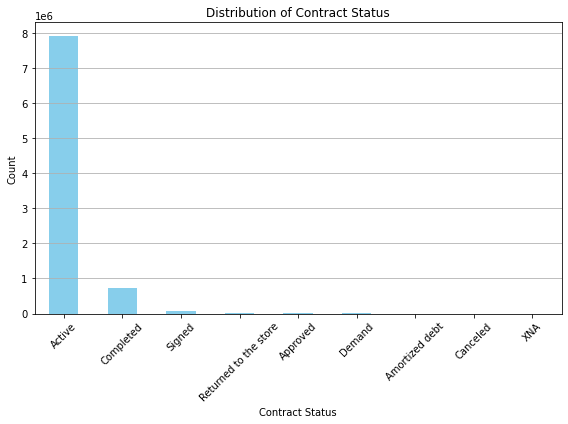

In [62]:
# Agregation on 'NAME_CONTRACT_STATUS' using COUNT
POS_CASH_balance_counts = POS_CASH_balance['NAME_CONTRACT_STATUS'].value_counts()

# Plot bar 'NAME_CONTRACT_STATUS'
plt.figure(figsize=(8, 6))
POS_CASH_balance_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Contract Status')
plt.xlabel('Contract Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


-  Dari plot diatas, dapat diamati bahwa status 'NAME_CONTRACT_STATUS' yang paling dominan adalah "Active" (Aktif). Ini menunjukkan bahwa mayoritas kredit sebelumnya masih dalam status aktif.

In [63]:
# Agregation Using Mean
POS_CASH_balance_mean = POS_CASH_balance.groupby('SK_ID_CURR')[['MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE']].mean().reset_index()

df_POS_CASH_balance_mean = pd.DataFrame(POS_CASH_balance_mean, columns=['SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE'])
df_POS_CASH_balance_mean.head()

,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE
0,100001,-69.750000,4.000000,1.500000
1,100002,-10.000000,24.000000,15.000000
2,100003,-43.785714,10.107143,5.785714
3,100004,-25.500000,3.750000,2.250000
4,100005,-20.000000,11.727273,7.181818


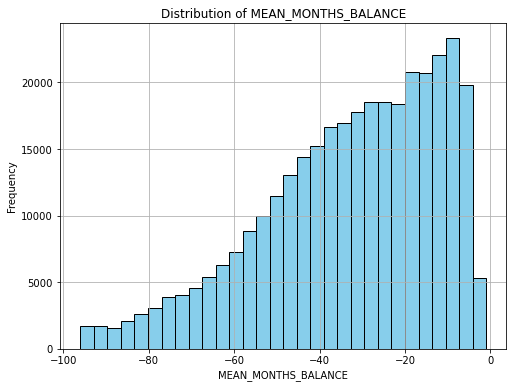

In [64]:
plt.figure(figsize=(8, 6))
plt.hist(df_POS_CASH_balance_mean['MONTHS_BALANCE'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of MEAN_MONTHS_BALANCE')
plt.xlabel('MEAN_MONTHS_BALANCE')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

- Plot diatas menunjukkan bahwa ada sedikit atau hampir tidak ada jeda waktu antara aplikasi kredit yang satu dengan yang lainnya, menunjukkan bahwa peminjam secara cepat mengajukan aplikasi kredit baru setelah aplikasi sebelumnya.

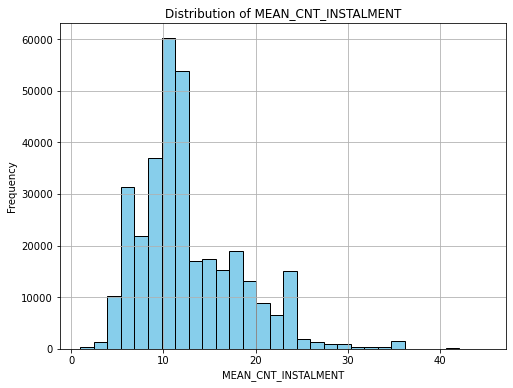

In [65]:
plt.figure(figsize=(8, 6))
plt.hist(df_POS_CASH_balance_mean['CNT_INSTALMENT'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of MEAN_CNT_INSTALMENT')
plt.xlabel('MEAN_CNT_INSTALMENT')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

- Plot diatas menunjukkan bahwa sebagian besar kredit sebelumnya memiliki rata-rata durasi atau jangka waktu yang dekat dengan angka 10. Hal ini dapat diartikan bahwa mayoritas kredit sebelumnya memiliki rata-rata durasi yang serupa atau berkisar sekitar angka 10.

### Aplication Dataset

#### Import Dataset

In [66]:
# Import Dataset 'application_train'
application_train = pd.read_csv('application_train.csv')

#### Handling Duplicate Value

In [67]:
# Cheking shape
print('application_train shape =', application_train.shape)

application_train shape = (307511, 122)


In [68]:
# Cheking duplicate value

print('application_train duplicated = ', application_train.duplicated().sum())

application_train duplicated =  0


#### Handling Missing Value

In [69]:
# checking persentage missing value 
total_null = pd.DataFrame(application_train.isnull().sum(),columns=['Total_Null_Values'])
total_null['Percentage'] = (total_null['Total_Null_Values']/application_train.shape[0])*100
total_null = total_null.sort_values(by='Percentage', ascending=False).reset_index()

pd.set_option('display.max_rows', None)
total_null

,index,Total_Null_Values,Percentage
0,COMMONAREA_MEDI,214865,69.872297
1,COMMONAREA_AVG,214865,69.872297
2,COMMONAREA_MODE,214865,69.872297
3,NONLIVINGAPARTMENTS_MODE,213514,69.432963
4,NONLIVINGAPARTMENTS_AVG,213514,69.432963
5,NONLIVINGAPARTMENTS_MEDI,213514,69.432963
6,FONDKAPREMONT_MODE,210295,68.386172
7,LIVINGAPARTMENTS_MODE,210199,68.354953
8,LIVINGAPARTMENTS_AVG,210199,68.354953
9,LIVINGAPARTMENTS_MEDI,210199,68.354953


In [70]:
# Drop colums have more then 50% missing value
application_train.drop(application_train.iloc[:, 44:91], inplace=True, axis=1)
application_train.drop(['OWN_CAR_AGE','EXT_SOURCE_1'], inplace=True, axis=1)

# Filled Missing Value 
categorical = application_train.select_dtypes(include=['object']).columns.tolist()
numerical = application_train.select_dtypes(include=['int64','float64']).columns.tolist()

for column in application_train:
    if application_train[column].isnull().any():
        if(column in categorical):
            application_train[column]=application_train[column].fillna(application_train[column].mode()[0])
        else:
            application_train[column]=application_train[column].fillna(application_train[column].median())

# checking persentage missing value 
total_null = pd.DataFrame(application_train.isnull().sum(),columns=['Total_Null_Values'])
total_null['Percentage'] = (total_null['Total_Null_Values']/application_train.shape[0])*100
total_null = total_null.sort_values(by='Percentage', ascending=False).reset_index()

pd.set_option('display.max_rows', None)
total_null

,index,Total_Null_Values,Percentage
0,SK_ID_CURR,0,0.0
1,REG_CITY_NOT_WORK_CITY,0,0.0
2,FLAG_DOCUMENT_8,0,0.0
3,FLAG_DOCUMENT_7,0,0.0
4,FLAG_DOCUMENT_6,0,0.0
5,FLAG_DOCUMENT_5,0,0.0
6,FLAG_DOCUMENT_4,0,0.0
7,FLAG_DOCUMENT_3,0,0.0
8,FLAG_DOCUMENT_2,0,0.0
9,DAYS_LAST_PHONE_CHANGE,0,0.0


#### Handling Outliers

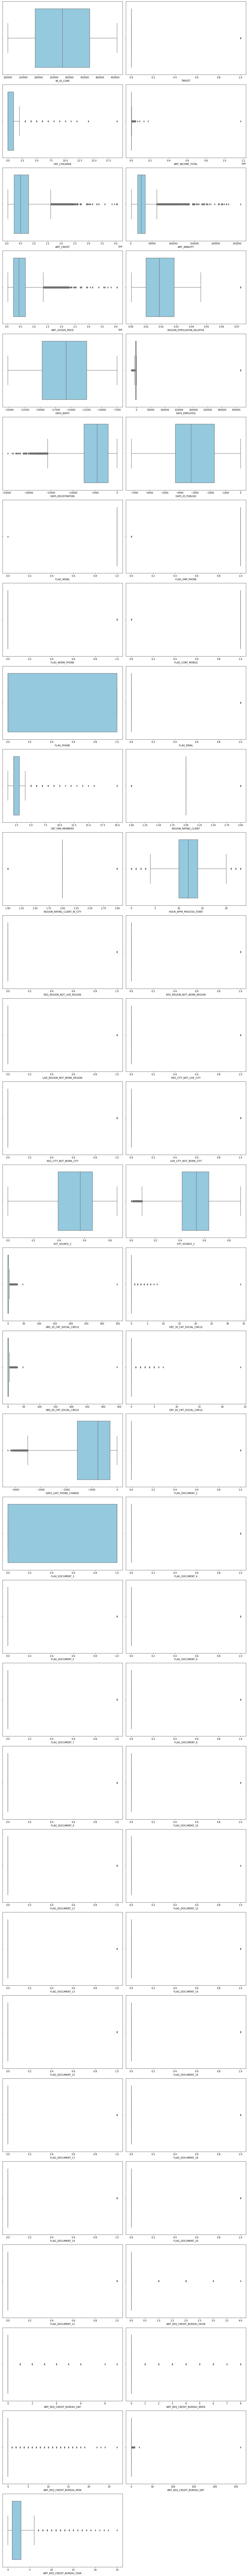

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

features = numerical
num_plots = len(features)
num_columns = 2  # Jumlah plot per baris
num_rows = math.ceil(num_plots / num_columns)  # Menghitung jumlah baris yang diperlukan

plt.figure(figsize=(15, 5*num_rows))  # Mengatur ukuran gambar sesuai jumlah baris

for i in range(num_plots):
    plt.subplot(num_rows, num_columns, i+1)
    sns.boxplot(x=application_train[features[i]], color='skyblue', orient='h')  # Mengatur orientasi menjadi horizontal
    plt.tight_layout()

plt.show()

- Tidak ada penghapusan outlier yang dilakukan pada DataFrame ini karena risiko kehilangan banyak kolom saat melakukan proses tersebut. Langkah tersebut dikhawatirkan akan mengurangi kemampuan untuk mendapatkan insight dari data.

#### EDA Aplication Dataset

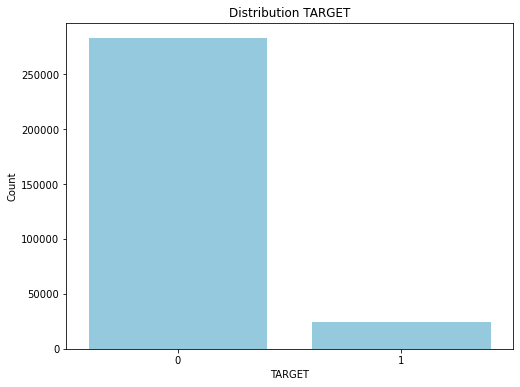

In [72]:
plt.figure(figsize=(8, 6))
sns.countplot(data=application_train, x='TARGET', color='skyblue')
plt.title('Distribution TARGET')
plt.xlabel('TARGET')
plt.ylabel('Count')
plt.show()

- Plot diatas menunjukan adanya ketidakseimbangan yang signifikan pada kolom Target. Ini berarti bahwa distribusi atau jumlah nilai dalam kolom tersebut sangat tidak seimbang. 

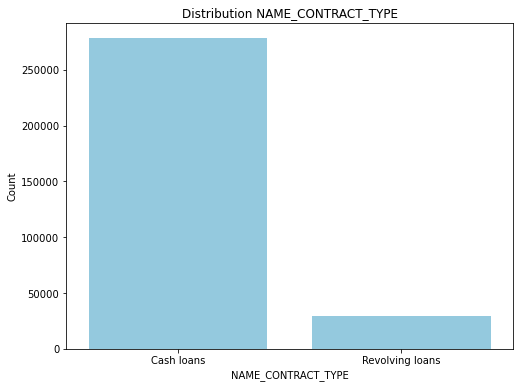

In [73]:
plt.figure(figsize=(8, 6))
sns.countplot(data=application_train, x='NAME_CONTRACT_TYPE', color='skyblue')
plt.title('Distribution NAME_CONTRACT_TYPE')
plt.xlabel('NAME_CONTRACT_TYPE')
plt.ylabel('Count')
plt.show()

- Plot diatas mengindikasikan bahwa mayoritas pinjaman yang ada sebenarnya adalah pinjaman tunai (cash loans) dibandingkan dengan pinjaman yang dapat diputar (revolving loans). Pinjaman tunai umumnya merujuk pada jenis pinjaman di mana peminjam menerima sejumlah uang secara langsung dan biasanya membayar kembali jumlah yang sama dalam periode waktu tertentu dengan bunga.

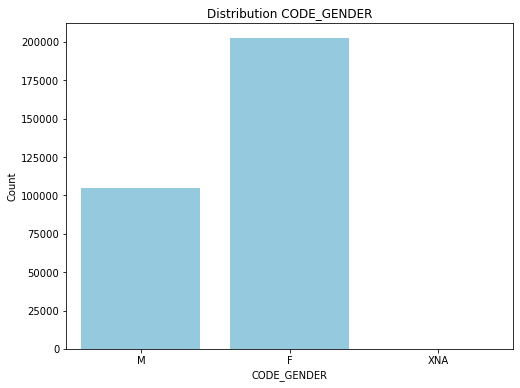

In [74]:
plt.figure(figsize=(8, 6))
sns.countplot(data=application_train, x='CODE_GENDER', color='skyblue')
plt.title('Distribution CODE_GENDER')
plt.xlabel('CODE_GENDER')
plt.ylabel('Count')
plt.show()

- Plot diatas mengindikasikan bahwa mayoritas pemohon pinjaman adalah wanita  dibandingkan dengan jumlah pemohon pinjaman pria. 

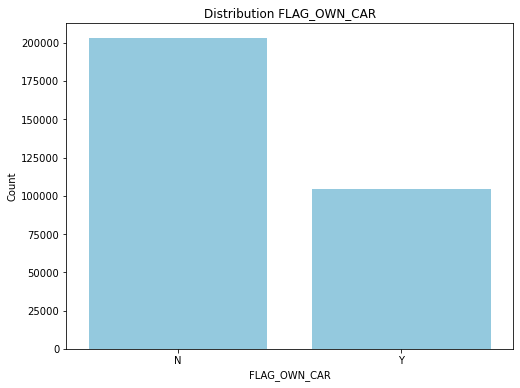

In [75]:
plt.figure(figsize=(8, 6))
sns.countplot(data=application_train, x='FLAG_OWN_CAR', color='skyblue')
plt.title('Distribution FLAG_OWN_CAR')
plt.xlabel('FLAG_OWN_CAR')
plt.ylabel('Count')
plt.show()

- Plot diatas mengindikasikan bahwa mayoritas pemohon pinjaman menyatakan tidak memiliki mobil

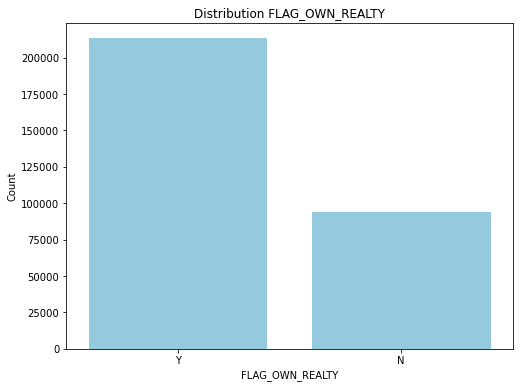

In [76]:
plt.figure(figsize=(8, 6))
sns.countplot(data=application_train, x='FLAG_OWN_REALTY', color='skyblue')
plt.title('Distribution FLAG_OWN_REALTY')
plt.xlabel('FLAG_OWN_REALTY')
plt.ylabel('Count')
plt.show()

- Plot diatas mengindikasikan bahwa mayoritas pemohon pinjaman memiliki tempat tinggal

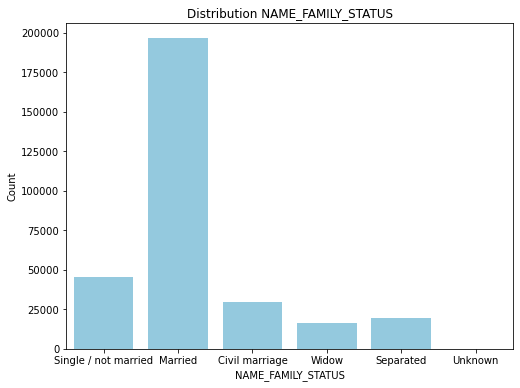

In [77]:
plt.figure(figsize=(8, 6))
sns.countplot(data=application_train, x='NAME_FAMILY_STATUS', color='skyblue')
plt.title('Distribution NAME_FAMILY_STATUS')
plt.xlabel('NAME_FAMILY_STATUS')
plt.ylabel('Count')
plt.show()

- Plot diatas mengindikasikan bahwa mayoritas pemohon pinjaman berstatus sudah menikah.

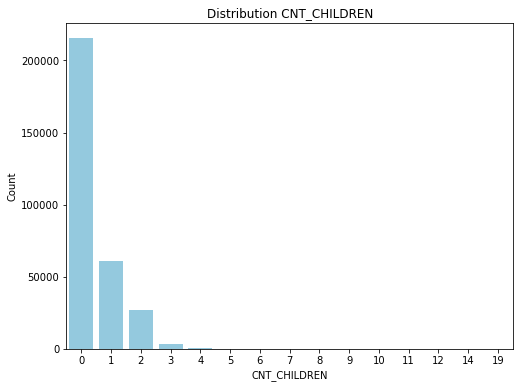

In [78]:
plt.figure(figsize=(8, 6))
sns.countplot(data=application_train, x='CNT_CHILDREN', color='skyblue')
plt.title('Distribution CNT_CHILDREN')
plt.xlabel('CNT_CHILDREN')
plt.ylabel('Count')
plt.show()

- Plot diatas menunjukan bahwa mayoritas pemohon pinjaman memiliki anak kurang dari 3

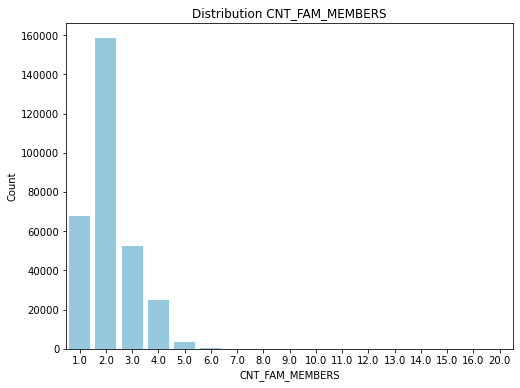

In [79]:
plt.figure(figsize=(8, 6))
sns.countplot(data=application_train, x='CNT_FAM_MEMBERS', color='skyblue')
plt.title('Distribution CNT_FAM_MEMBERS')
plt.xlabel('CNT_FAM_MEMBERS')
plt.ylabel('Count')
plt.show()

-  Plot diatas menunjukan bahwa mayoritas pemohon pinjaman memiliki jumlah keluarga kurang dari 5

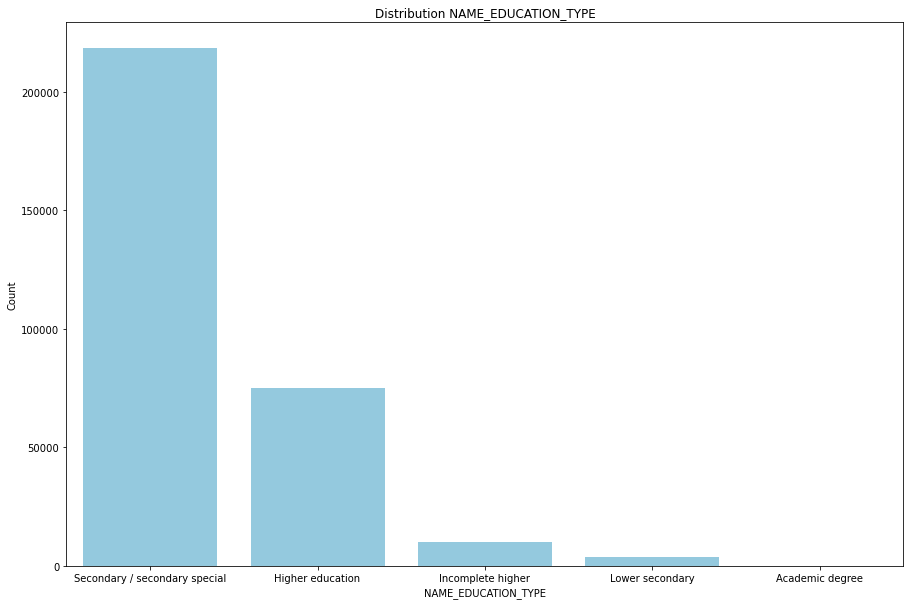

In [80]:
plt.figure(figsize=(15, 10))
sns.countplot(data=application_train, x='NAME_EDUCATION_TYPE', color='skyblue')
plt.title('Distribution NAME_EDUCATION_TYPE')
plt.xlabel('NAME_EDUCATION_TYPE')
plt.ylabel('Count')
plt.show()

- Plot diatas menunjukan bahwa mayoritas pemohon pinjaman merupakan lulusan SMA

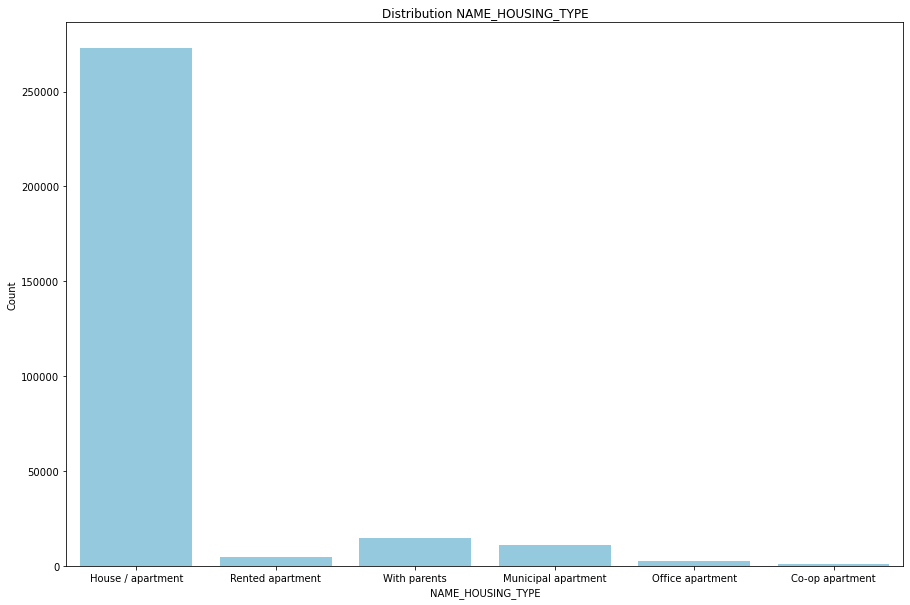

In [81]:
plt.figure(figsize=(15, 10))
sns.countplot(data=application_train, x='NAME_HOUSING_TYPE', color='skyblue')
plt.title('Distribution NAME_HOUSING_TYPE')
plt.xlabel('NAME_HOUSING_TYPE')
plt.ylabel('Count')
plt.show()

- plot diatas menunjukan properti dengan tipe rumah atau apartemen standar memiliki bagian atau porsi terbesar dibandingkan dengan jenis hunian lainnya.

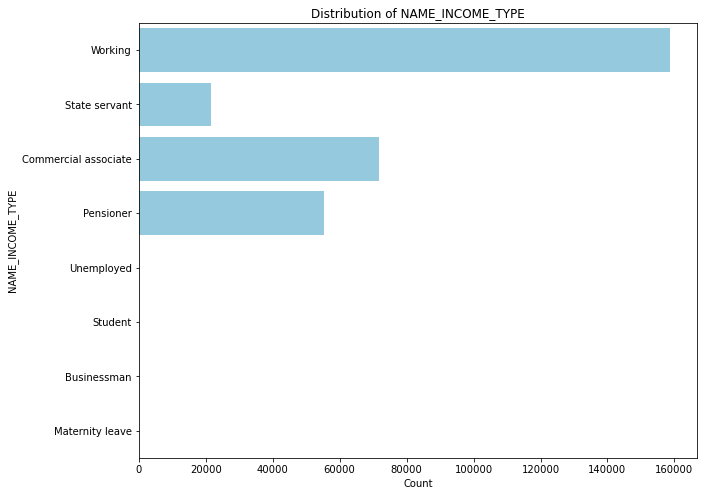

In [82]:
plt.figure(figsize=(10, 8))
sns.countplot(data=application_train, y='NAME_INCOME_TYPE', color='skyblue')
plt.title('Distribution of NAME_INCOME_TYPE')
plt.xlabel('Count')
plt.ylabel('NAME_INCOME_TYPE')
plt.show()

- Plot diatas menunujukan jika mayoritas pengaju pinjaman sudah bekerja

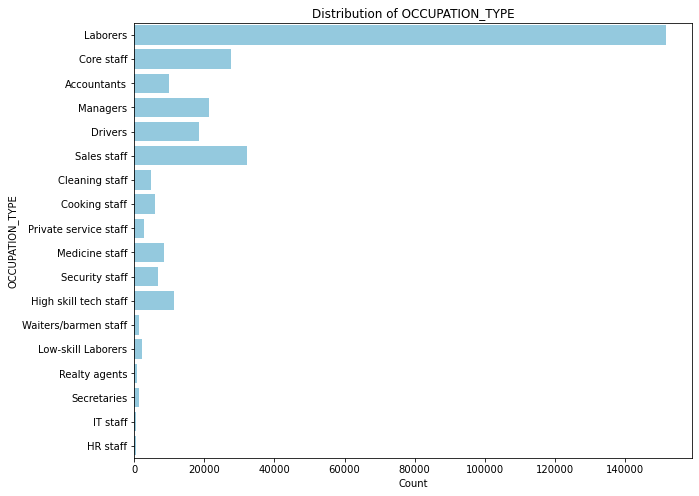

In [83]:
plt.figure(figsize=(10, 8))
sns.countplot(data=application_train, y='OCCUPATION_TYPE', color='skyblue')
plt.title('Distribution of OCCUPATION_TYPE')
plt.xlabel('Count')
plt.ylabel('OCCUPATION_TYPE')
plt.show()

-  Plot diatas menunujukan jika mayoritas pengaju pinjaman bekerja sebagai laborers

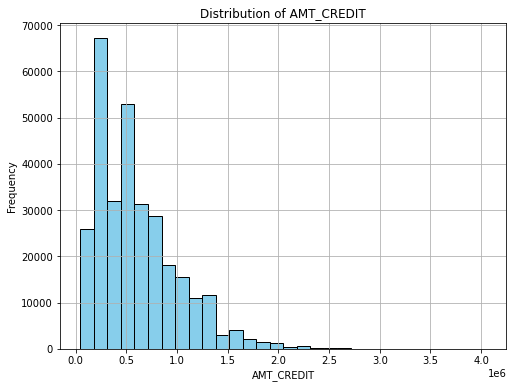

In [84]:
plt.figure(figsize=(8, 6))
plt.hist(application_train['AMT_CREDIT'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of AMT_CREDIT')
plt.xlabel('AMT_CREDIT')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

-  Plot diatas menunujukan jika credit amount sebagian besar merada dibawah 1M

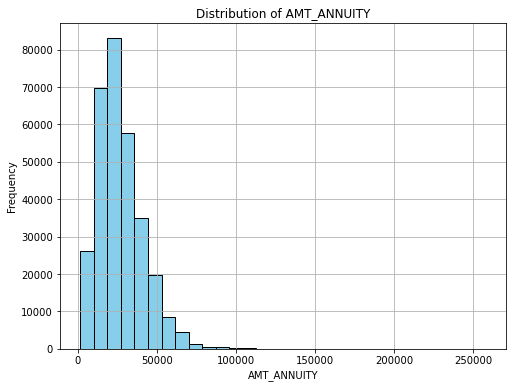

In [85]:
plt.figure(figsize=(8, 6))
plt.hist(application_train['AMT_ANNUITY'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of AMT_ANNUITY')
plt.xlabel('AMT_ANNUITY')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

-  Plot diatas menunujukan jika mayoritas annuity berda di bawah 100000

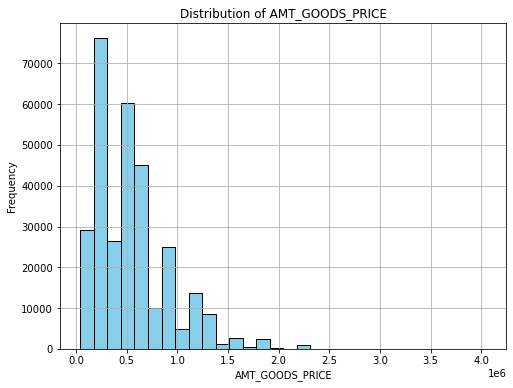

In [86]:
plt.figure(figsize=(8, 6))
plt.hist(application_train['AMT_GOODS_PRICE'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of AMT_GOODS_PRICE')
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

-  Plot diatas menunujukan jika  mayoritas barang yang dibeli menggunakan pinjaman konsumen memiliki nilai kurang dari 2 juta.

#### EDA Aplication Dataset in Deeper

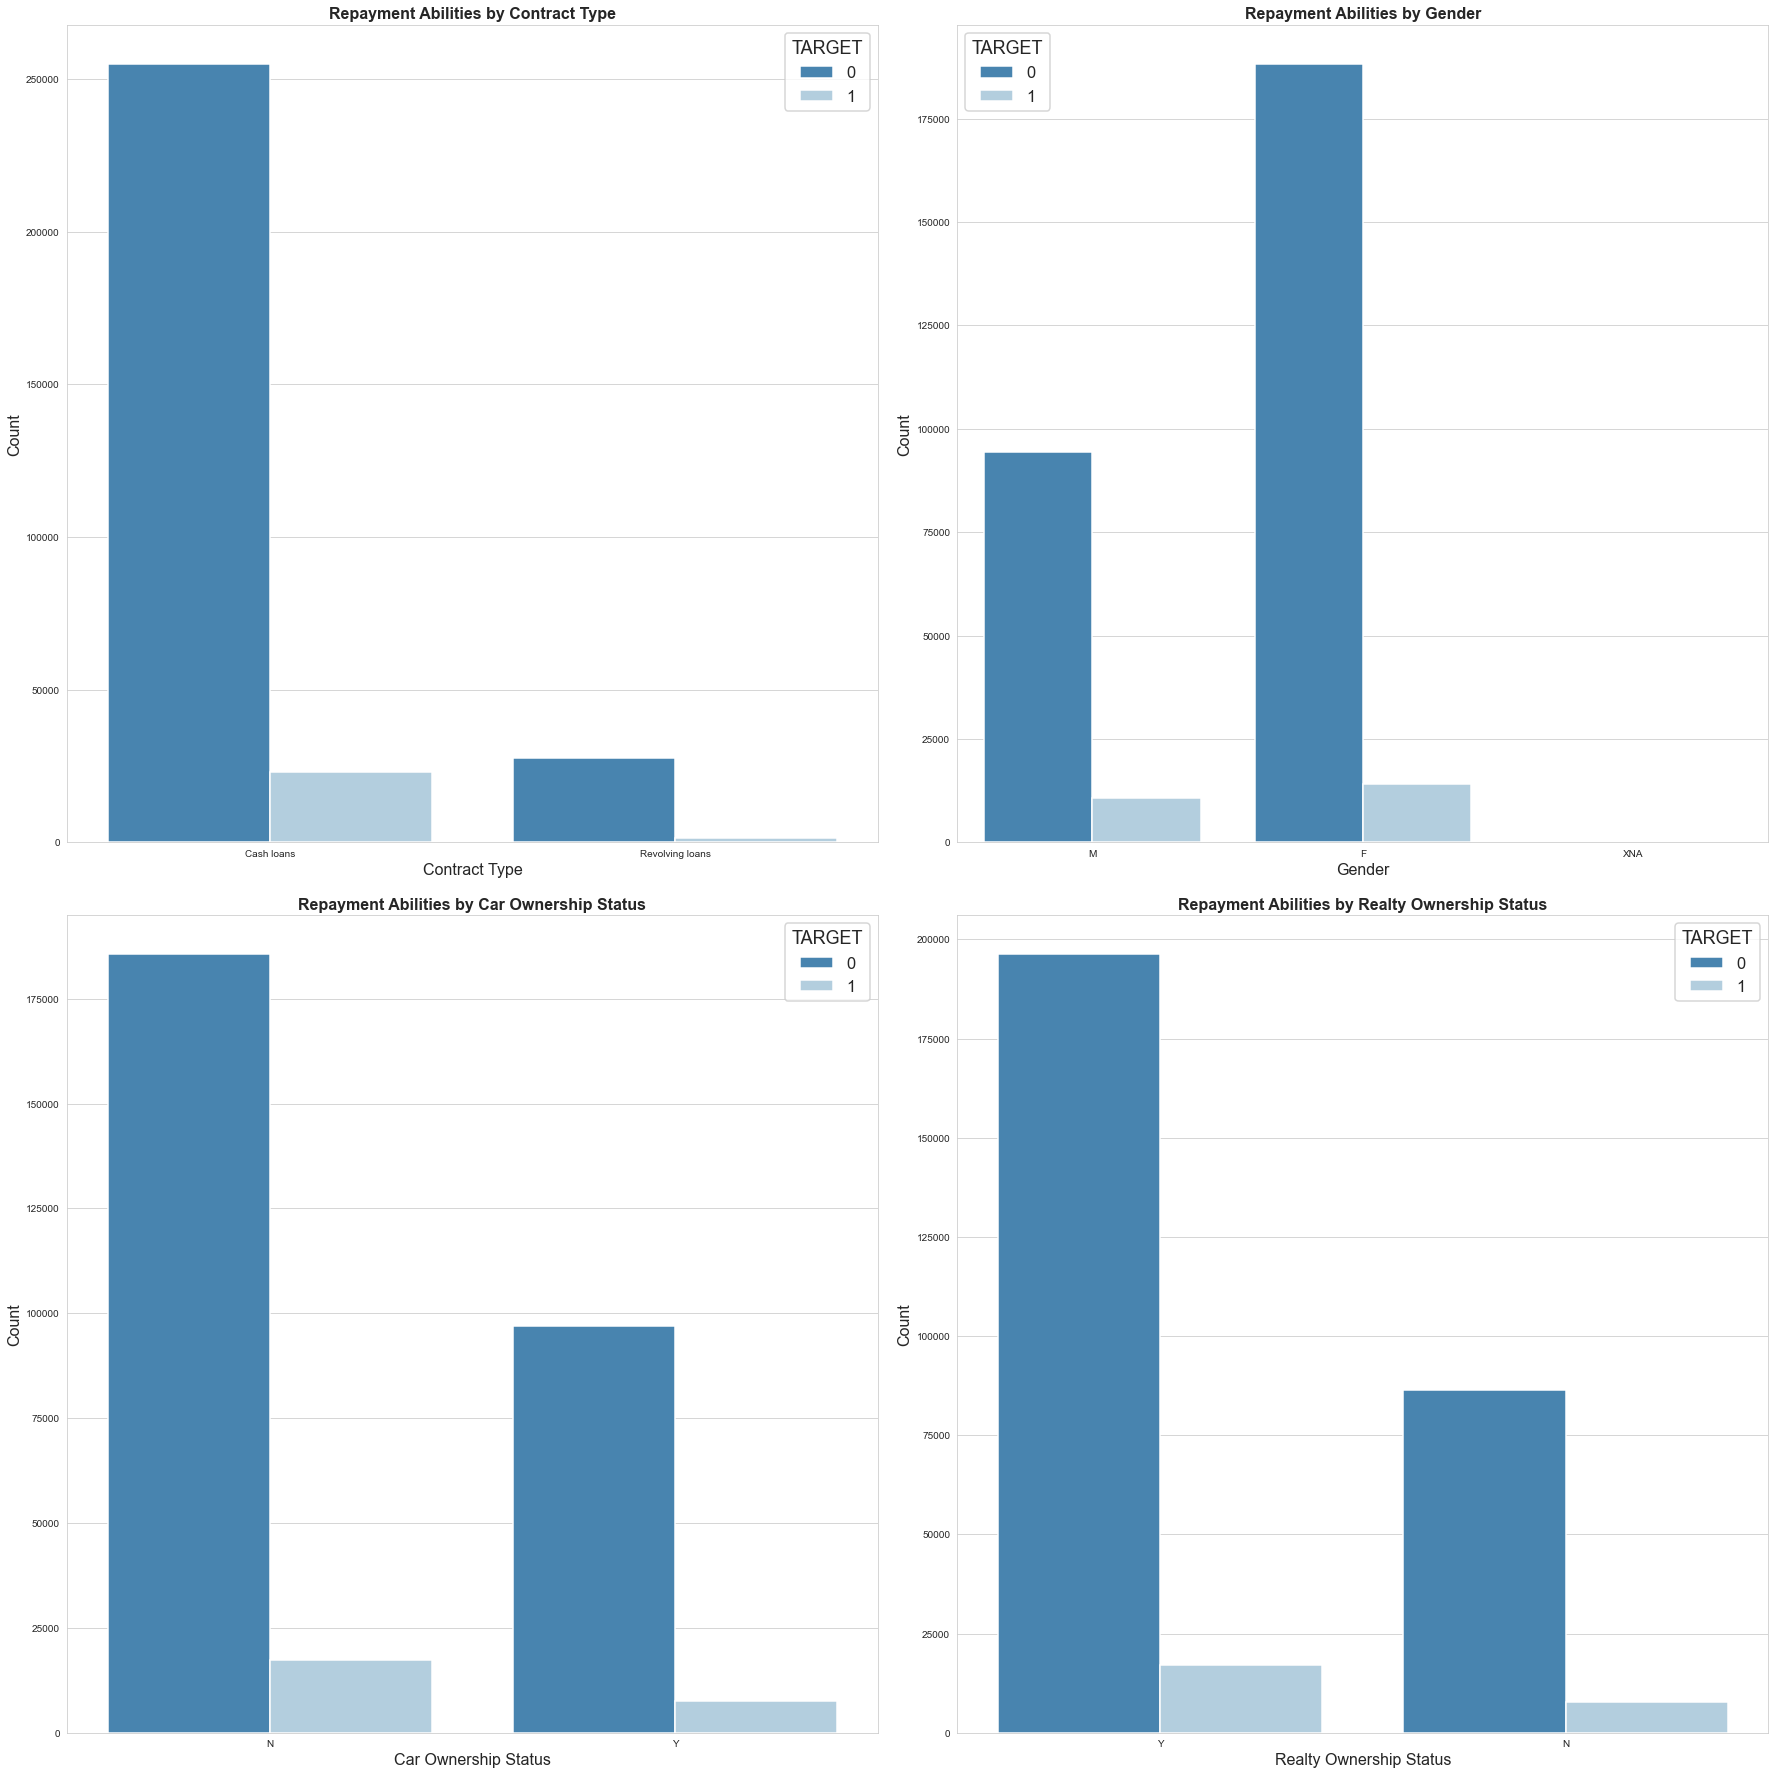

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
fig, ax = plt.subplots(2, 2, figsize=(25, 25))
sns.set_context('talk', font_scale=1)

sns.countplot(x='NAME_CONTRACT_TYPE', data=application_train, hue='TARGET', palette='Blues_r', ax=ax[0][0])
ax[0][0].set_title('Repayment Abilities by Contract Type', fontweight='bold', fontsize=16)
ax[0][0].set_xlabel('Contract Type', fontsize=16)
ax[0][0].set_ylabel('Count', fontsize=16)
ax[0][0].tick_params(axis='x', labelrotation=0)

sns.countplot(x='CODE_GENDER', data=application_train, hue='TARGET', palette='Blues_r', ax=ax[0][1])
ax[0][1].set_title('Repayment Abilities by Gender', fontweight='bold', fontsize=16)
ax[0][1].set_xlabel('Gender', fontsize=16)
ax[0][1].set_ylabel('Count', fontsize=16)
ax[0][1].tick_params(axis='x', labelrotation=0)

sns.countplot(x='FLAG_OWN_CAR', data=application_train, hue='TARGET', palette='Blues_r', ax=ax[1][0])
ax[1][0].set_title('Repayment Abilities by Car Ownership Status', fontweight='bold', fontsize=16)
ax[1][0].set_xlabel('Car Ownership Status', fontsize=16)
ax[1][0].set_ylabel('Count', fontsize=16)
ax[1][0].tick_params(axis='x', labelrotation=0)

sns.countplot(x='FLAG_OWN_REALTY', data=application_train, hue='TARGET', palette='Blues_r', ax=ax[1][1])
ax[1][1].set_title('Repayment Abilities by Realty Ownership Status', fontweight='bold', fontsize=16)
ax[1][1].set_xlabel('Realty Ownership Status', fontsize=16)
ax[1][1].set_ylabel('Count', fontsize=16)
ax[1][1].tick_params(axis='x', labelrotation=0)


plt.tight_layout()
plt.show()

- Cash Loan merupakan pinjaman yang paling dominan, namun memiliki masalah pembayaran yang tinggi.
- Pengaju pinjaman terbanyak berdasarkan gender dalah wanita, resiko masalah bayar pria dan wanita tidak terlalu berbeda jauh
- Pengaju pinjaman yang tidak memiliki mobil memiliki resiko gagal bayar yang lebih tinggi ketimbang pengaju yang memiliki mobil
- Pinjamn diajukan paling banyak oleh client yang memiliki rumah, namun masalah bayar paling besar juga terdapat pada client yang memiliki rumah

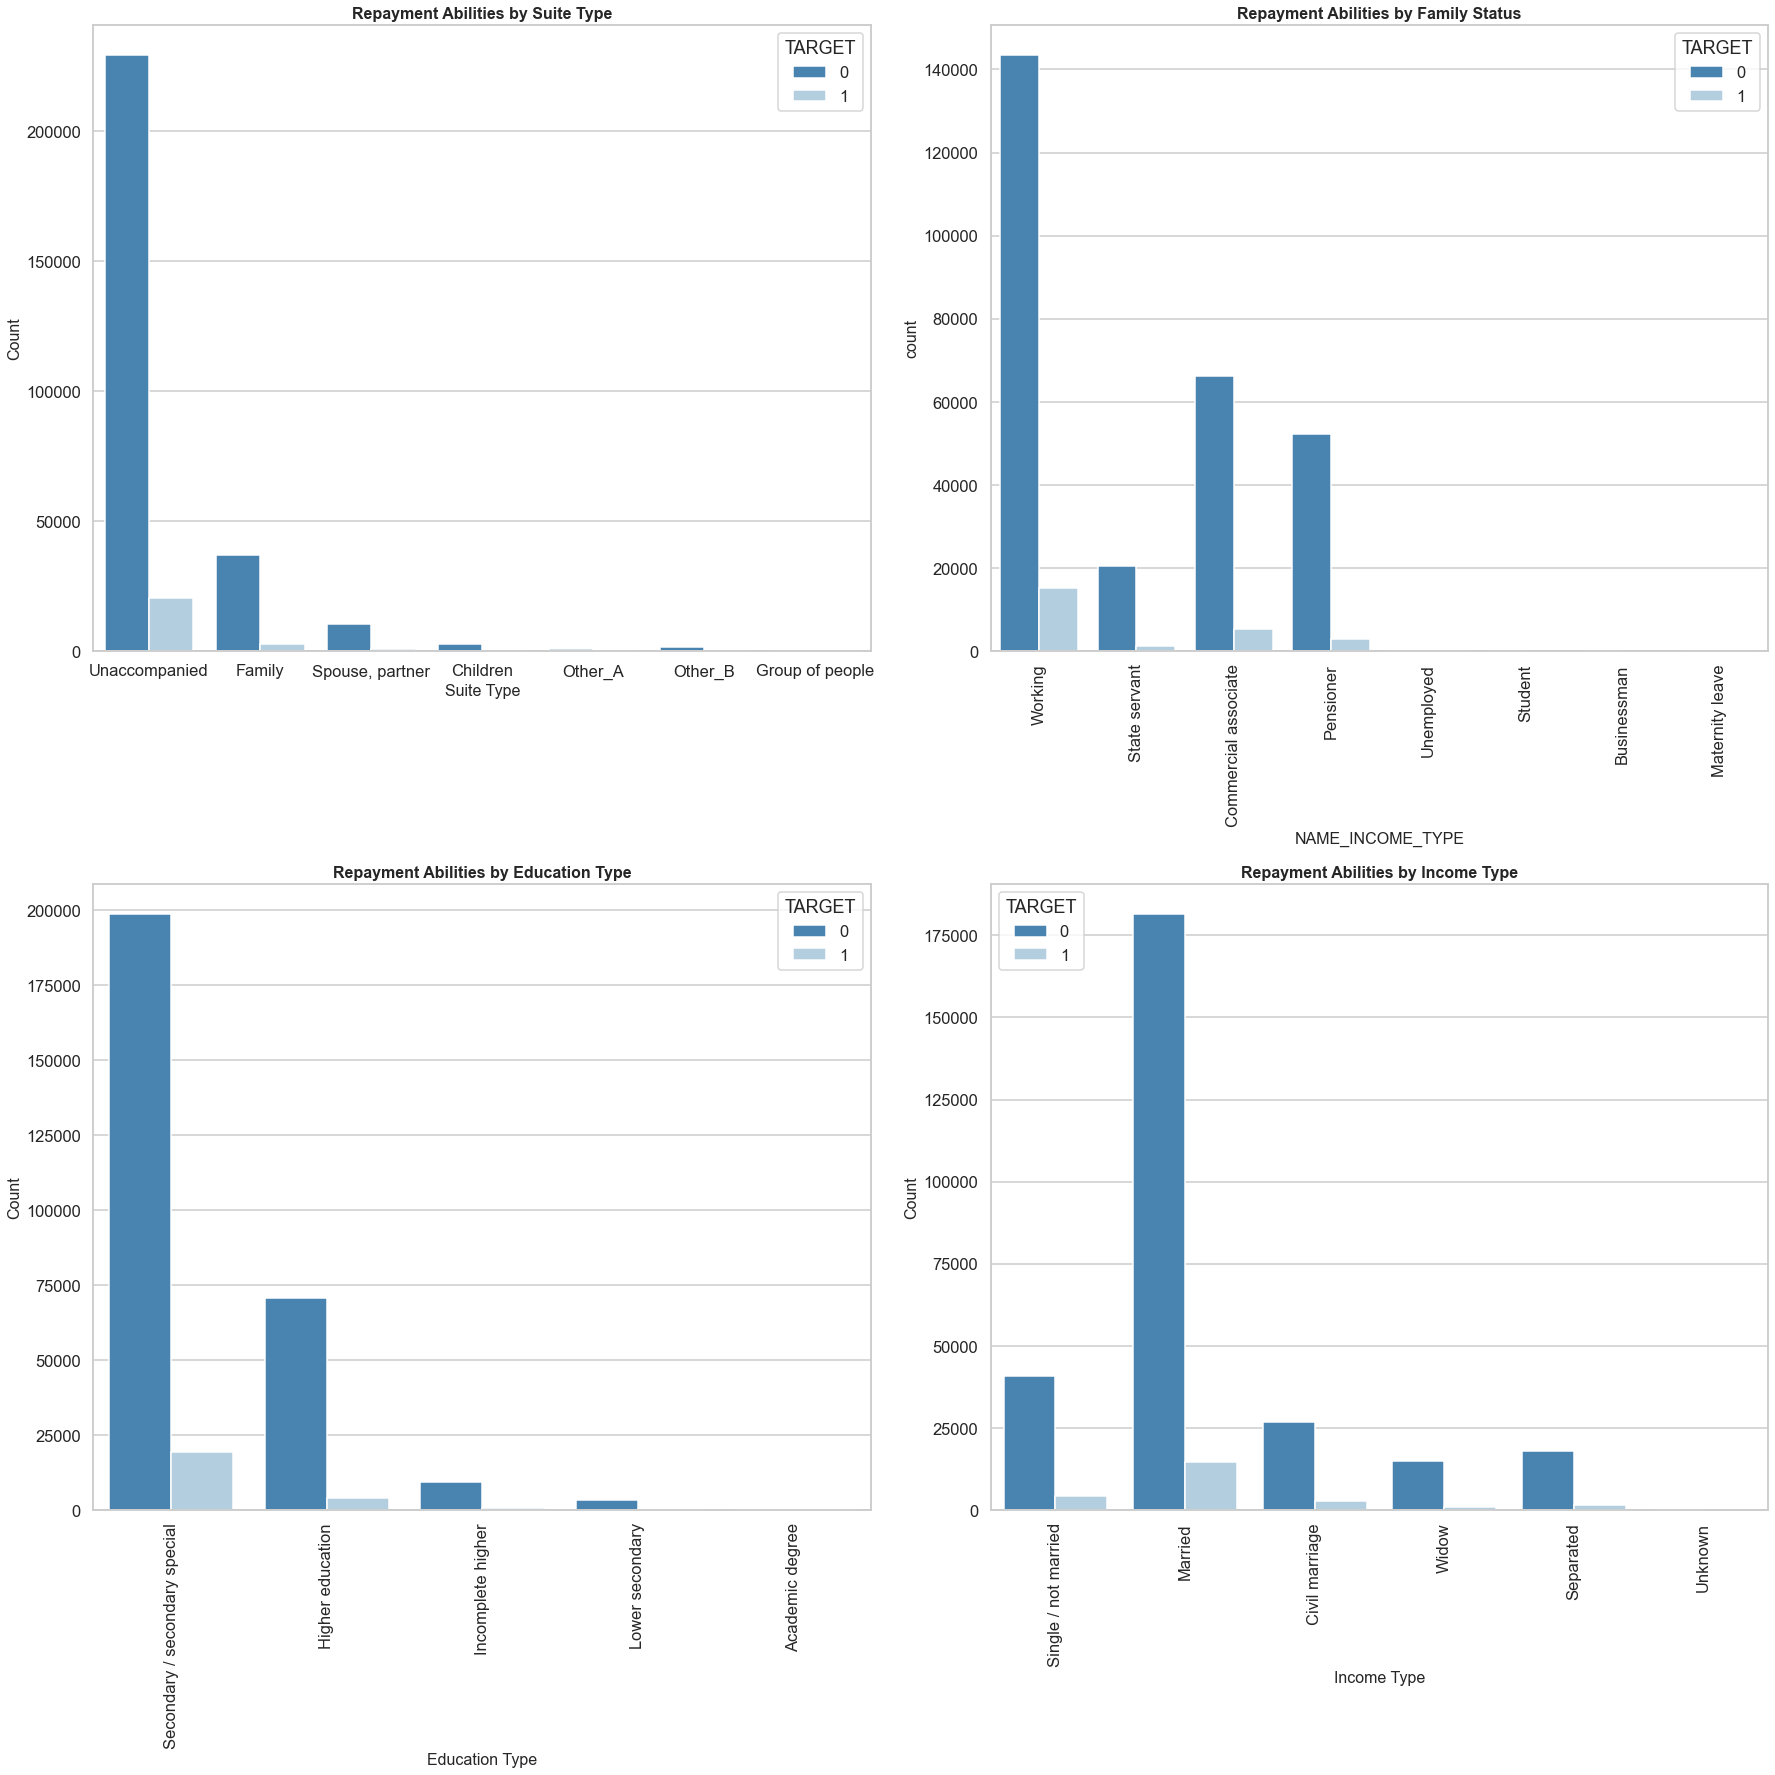

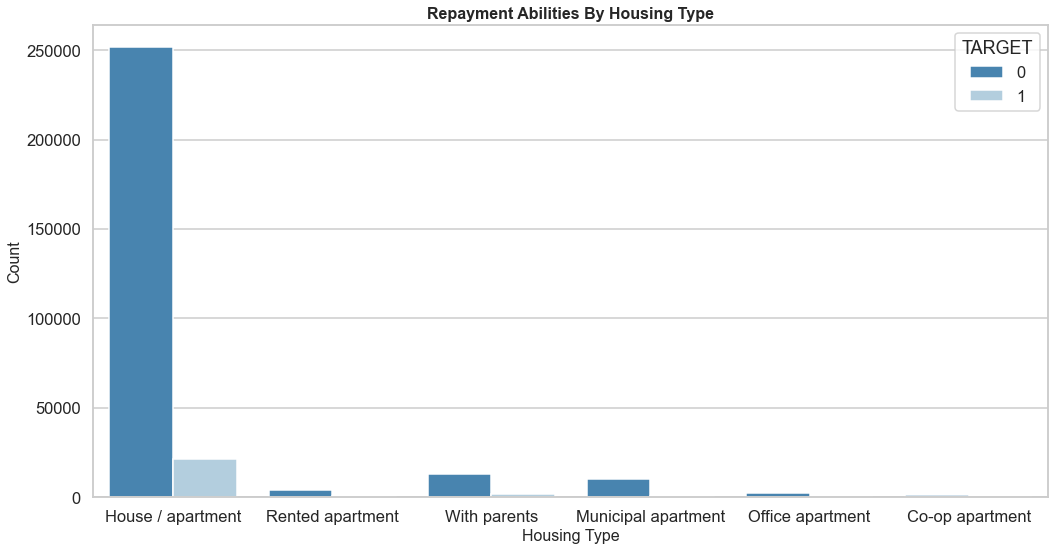

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
fig, ax = plt.subplots(2, 2, figsize=(25, 25))
sns.set_context('talk', font_scale=1)

sns.countplot(x='NAME_TYPE_SUITE', data=application_train, hue='TARGET', palette='Blues_r', ax=ax[0][0])
ax[0][0].set_title('Repayment Abilities by Suite Type', fontweight='bold', fontsize=16)
ax[0][0].set_xlabel('Suite Type', fontsize=16)
ax[0][0].set_ylabel('Count', fontsize=16)

sns.countplot(x='NAME_FAMILY_STATUS', data=application_train, hue='TARGET', palette='Blues_r', ax=ax[1][1])
ax[0][1].set_title('Repayment Abilities by Family Status', fontweight='bold', fontsize=16)
ax[0][1].set_xlabel('Family Status', fontsize=16)
ax[0][1].set_ylabel('Count', fontsize=16)
ax[0][1].tick_params(axis='x', labelrotation=90)

sns.countplot(x='NAME_EDUCATION_TYPE', data=application_train, hue='TARGET', palette='Blues_r', ax=ax[1][0])
ax[1][0].set_title('Repayment Abilities by Education Type', fontweight='bold', fontsize=16)
ax[1][0].set_xlabel('Education Type', fontsize=16)
ax[1][0].set_ylabel('Count', fontsize=16)
ax[1][0].tick_params(axis='x', labelrotation=90)

sns.countplot(x='NAME_INCOME_TYPE', data=application_train, hue='TARGET',palette='Blues_r', ax=ax[0][1])
ax[1][1].set_title('Repayment Abilities by Income Type', fontweight='bold', fontsize=16)
ax[1][1].set_xlabel('Income Type', fontsize=16)
ax[1][1].set_ylabel('Count', fontsize=16)
ax[1][1].tick_params(axis='x', labelrotation=90)


plt.tight_layout()

plt.figure(figsize=(15, 8))
fig = sns.countplot(x='NAME_HOUSING_TYPE', data=application_train, hue='TARGET', palette='Blues_r')
plt.title('Repayment Abilities By Housing Type', fontweight='bold', fontsize=16)
plt.xlabel('Housing Type', fontsize=16)
plt.ylabel('Count', fontsize=16)

plt.tight_layout()
plt.show()

- Dapat diamati bahwa pengaju pinjaman dengan tipe pendapatan dari pekerjaan memiliki mayoritas pengajuan pinjaman yang lebih besar
- Terlihat bahwa pengaju pinjaman yang sudah menikah telah mengajukan mayoritas pinjaman.
- Pengaju pinjaman yang tinggal di rumah/apartemen memiliki jumlah pengajuan pinjaman tertinggi.

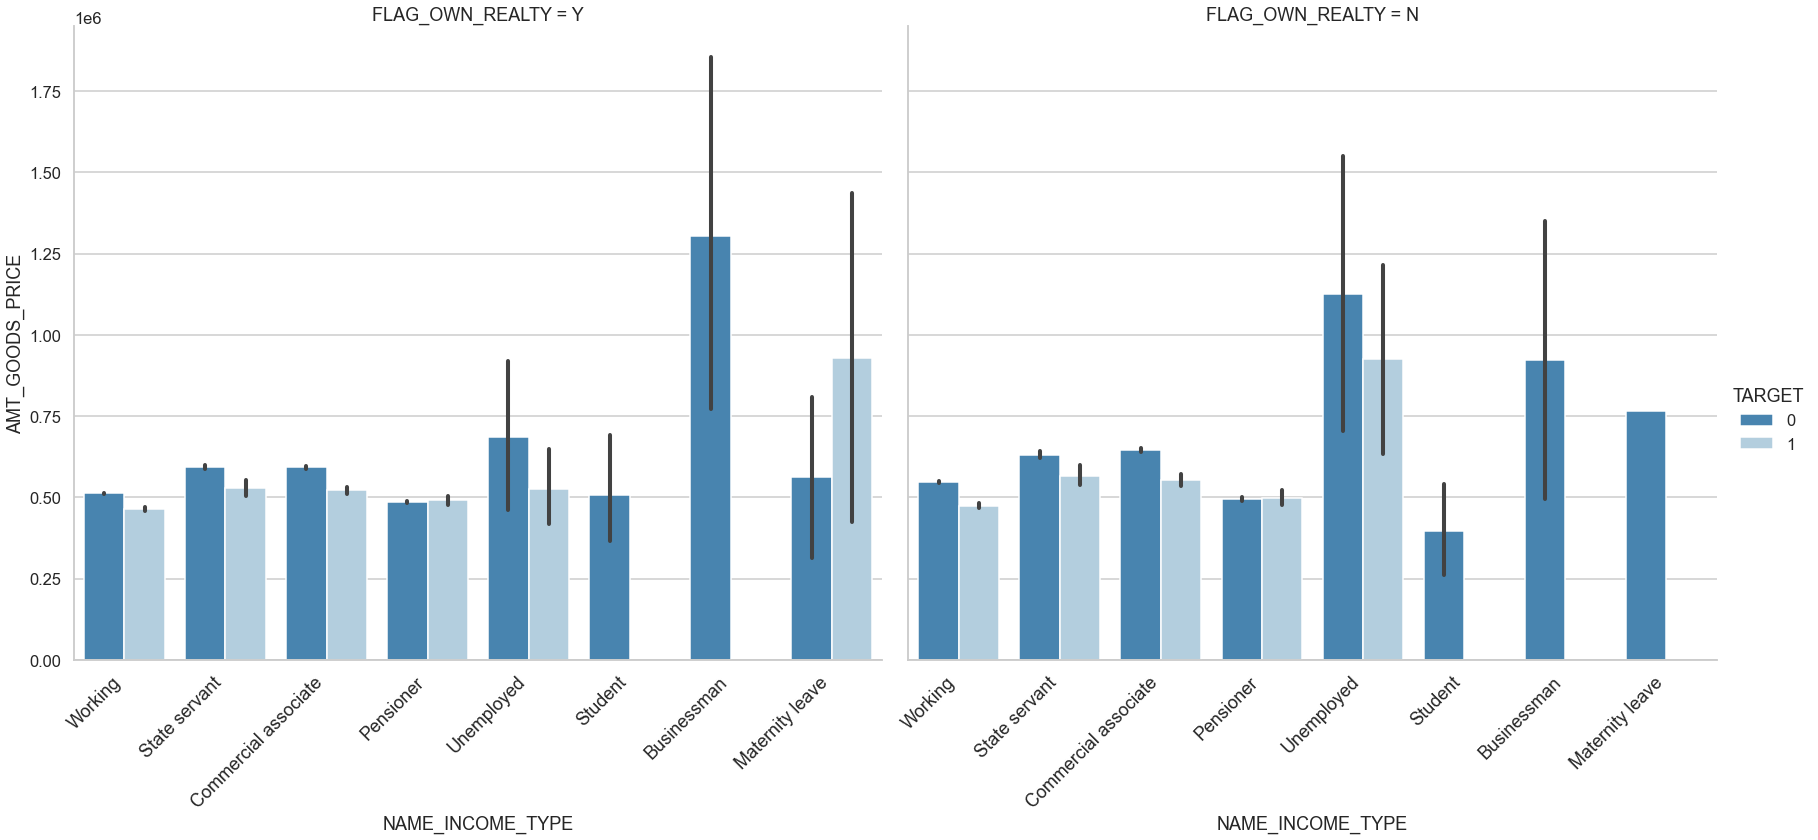

In [89]:
fig = sns.catplot(
    x='NAME_INCOME_TYPE',
    y='AMT_GOODS_PRICE',
    hue='TARGET',
    col='FLAG_OWN_REALTY',
    kind='bar',
    palette='Blues_r',
    data=application_train,
    height=10,  # Menentukan tinggi grafik
    aspect=1.2  # Menentukan aspek grafik
)

fig.set_xticklabels(rotation=45, ha='right', fontsize=18)
plt.show()

- Pengaju pinjaman dengan (NAME_INCOME_TYPE) maternity leave dan (FLAG_OWN_REALTY = Yes) memiliki rumah tinggal memiliki masalah dalam pembayaran pinjaman dibandingkan dengan (NAME_INCOME_TYPE) maternity leave dan (FLAG_OWN_REALTY = No)tidak memiliki rumah tinggal

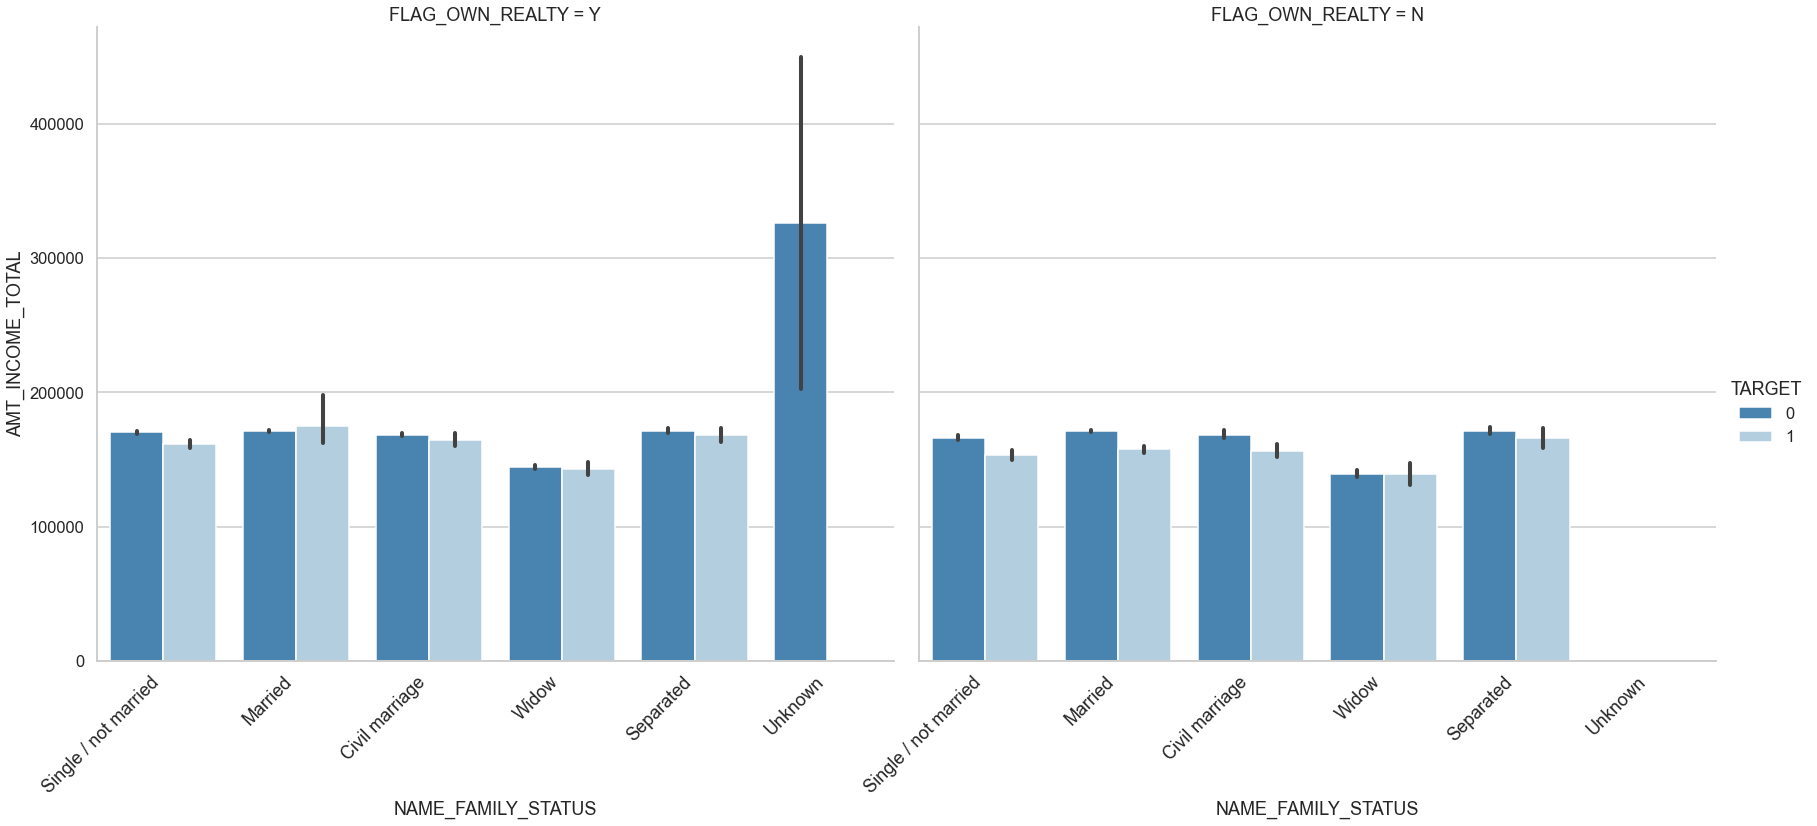

In [90]:
fig = sns.catplot(
    x='NAME_FAMILY_STATUS',
    y='AMT_INCOME_TOTAL',
    hue='TARGET',
    col='FLAG_OWN_REALTY',
    kind='bar',
    palette='Blues_r',
    data=application_train,
    height=10,  # Menentukan tinggi grafik
    aspect=1.2  # Menentukan aspek grafik
)

fig.set_xticklabels(rotation=45, ha='right', fontsize=18)
plt.show()

- Pengaju Pinjaman dengan status (NAME_FAMILY_STATUS) menikah dan memiliki rumah (FLAG_OWN_REALTY = Yes) cenderung memiliki masalah pembayaran pinjaman lebih sering dibandingkan dengan mereka yang tidak memiliki rumah (FLAG_OWN_REALTY = No).

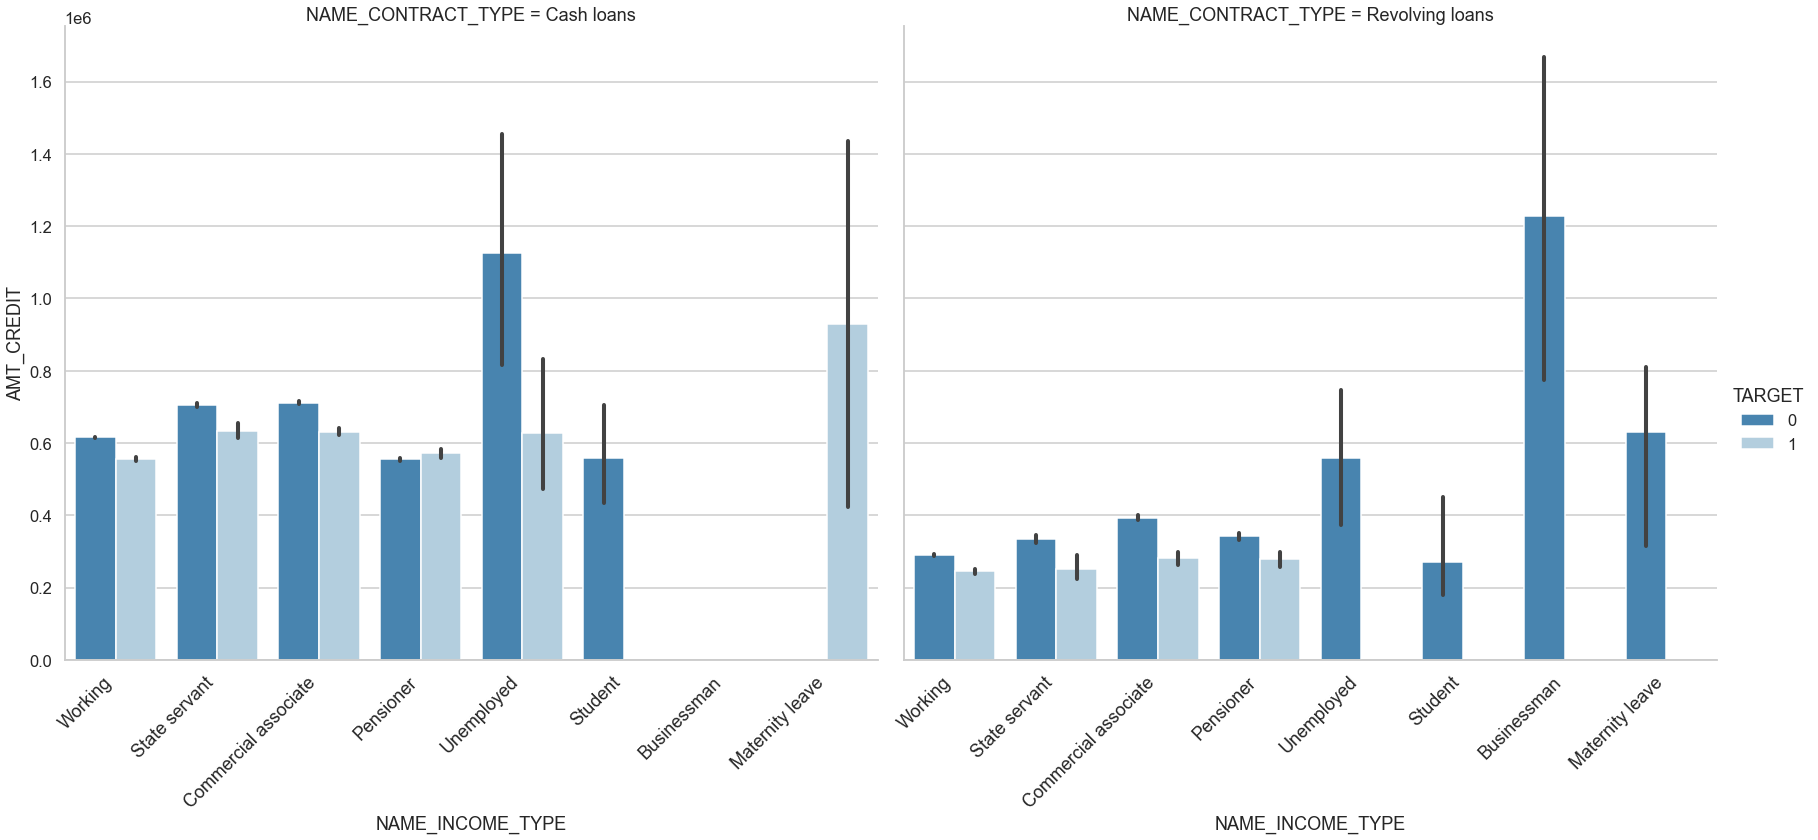

In [91]:
fig = sns.catplot(
    x='NAME_INCOME_TYPE',
    y='AMT_CREDIT',
    hue='TARGET',
    col='NAME_CONTRACT_TYPE',
    kind='bar',
    palette='Blues_r',
    data=application_train,
    height=10,  # Menentukan tinggi grafik
    aspect=1.2  # Menentukan aspek grafik
)

fig.set_xticklabels(rotation=45, ha='right', fontsize=18)
plt.show()

- Pengaju pinjaman yang mengambil cuti melahirkan dengan pinjaman tunai mengalami kesulitan dalam membayar kredit dengan jumlah kredit sedang. Sementara mereka yang juga dalam cuti melahirkan namun memiliki pinjaman bergulir tidak mengalami kesulitan dalam pembayaran kredit.
- Untuk pengaju pinjaman yang tidak bekerja dengan pinjaman tunai, lebih dari setengah dari mereka mengalami kesulitan dalam pembayaran kredit dengan jumlah kredit sedang. Namun, pengaju pinjaman yang tidak bekerja namun memiliki pinjaman bergulir tidak mengalami kesulitan dalam membayar kredit.
- Semua pengaju pinjaman sebagai mahasiswa tidak mengalami kesulitan dalam membayar kredit, baik dengan pinjaman tunai maupun pinjaman bergulir, untuk jumlah kredit rendah hingga sedang.

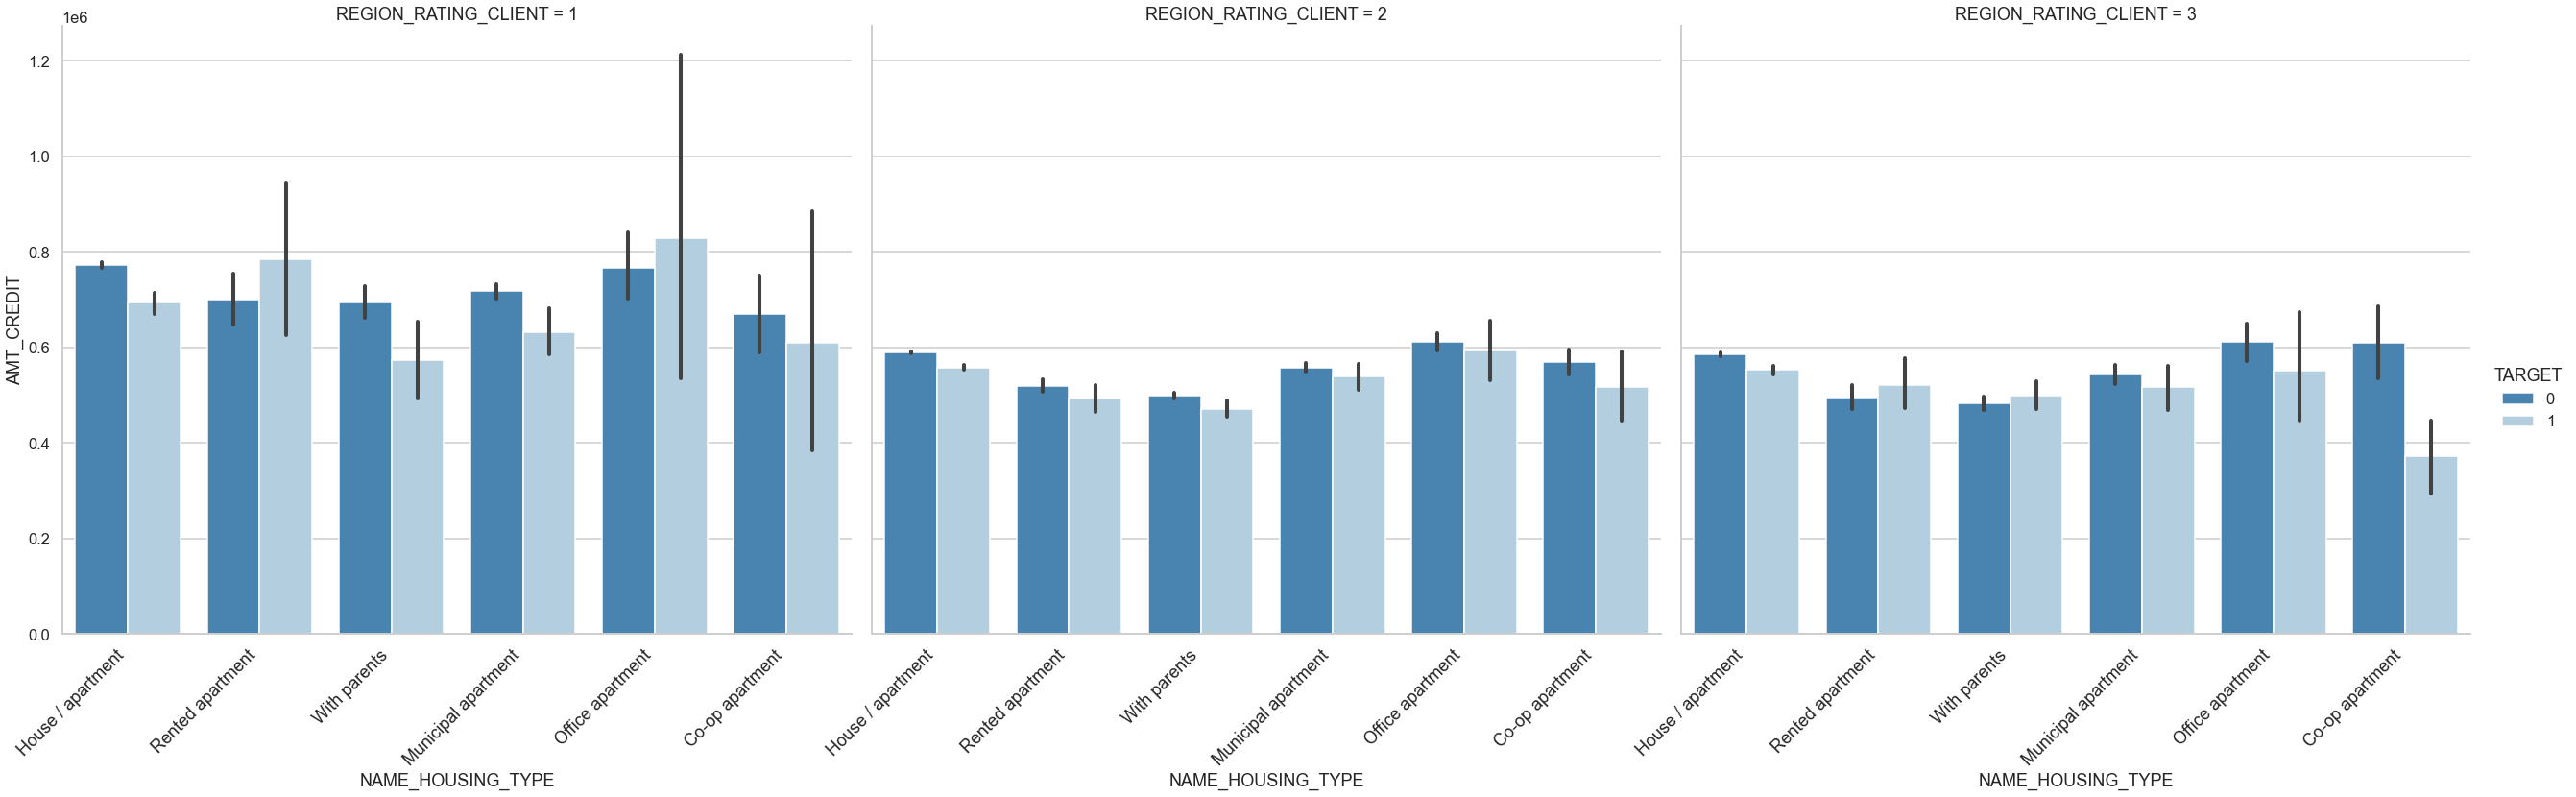

In [92]:
fig = sns.catplot(
    x='NAME_HOUSING_TYPE',
    y='AMT_CREDIT',
    hue='TARGET',
    col='REGION_RATING_CLIENT',
    kind='bar',
    palette='Blues_r',
    data=application_train,
    height=10,  # Menentukan tinggi grafik
    aspect=1.2  # Menentukan aspek grafik
)

fig.set_xticklabels(rotation=45, ha='right', fontsize=18)
plt.show()

- Pengaju pinjaman yang tinggal di rented apartment dan office apartment di daerah dengan rating 1 mengalami kesulitan dalam pembayaran kredit dibandingkan dengan pengaju pinjaman di daerah dengan rating 2 untuk jumlah kredit sedang.

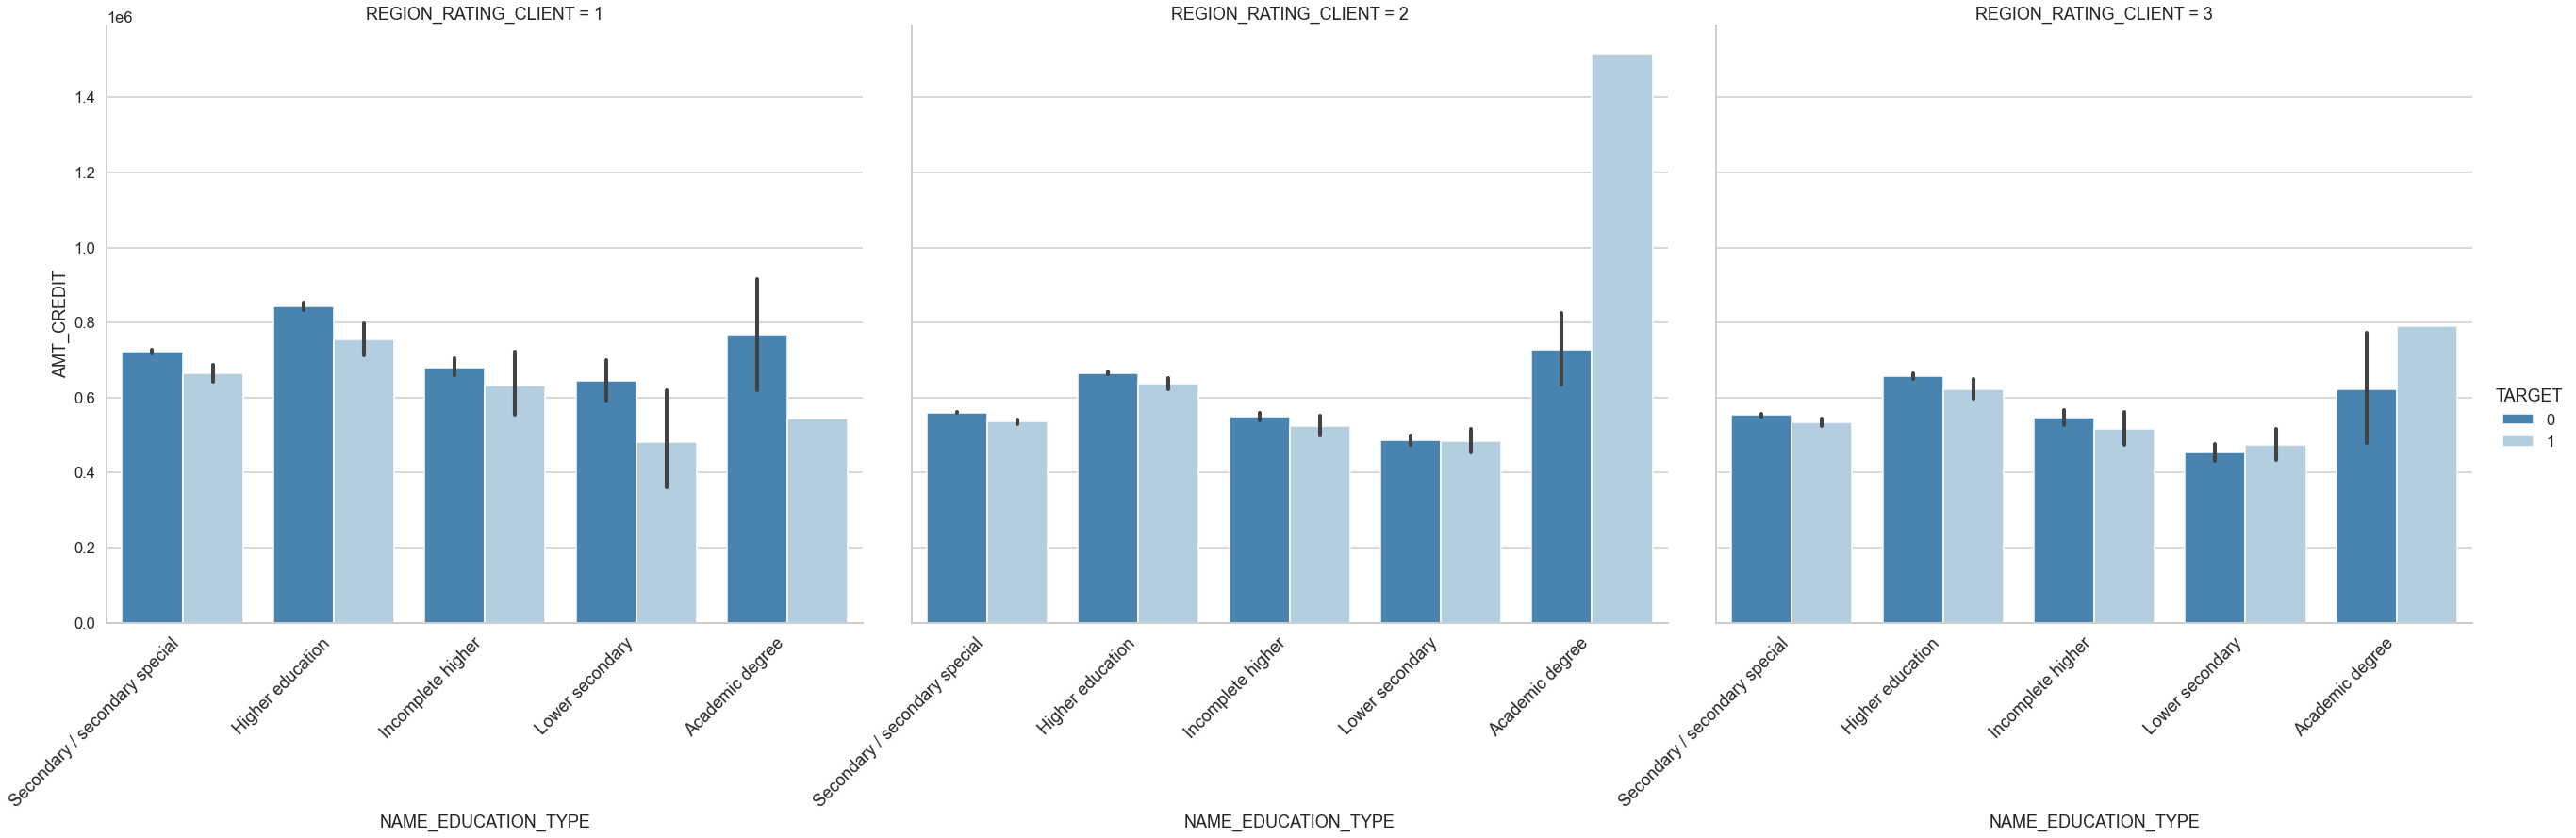

In [93]:
fig = sns.catplot(
    x='NAME_EDUCATION_TYPE',
    y='AMT_CREDIT',
    hue='TARGET',
    col='REGION_RATING_CLIENT',
    kind='bar',
    palette='Blues_r',
    data=application_train,
    height=10,  # Menentukan tinggi grafik
    aspect=1.2  # Menentukan aspek grafik
)

fig.set_xticklabels(rotation=45, ha='right', fontsize=18)
plt.show()

- Pengaju pinjaman yang memiliki academic degree dan tinggal di daerah dengan rating 2 mengalami kesulitan dalam membayar pinjaman dengan jumlah kredit yang lebih tinggi. Sementara klien dengan academic degree tetapi tinggal di daerah dengan rating 3 mengalami kesulitan dalam membayar pinjaman dengan jumlah kredit sedang.

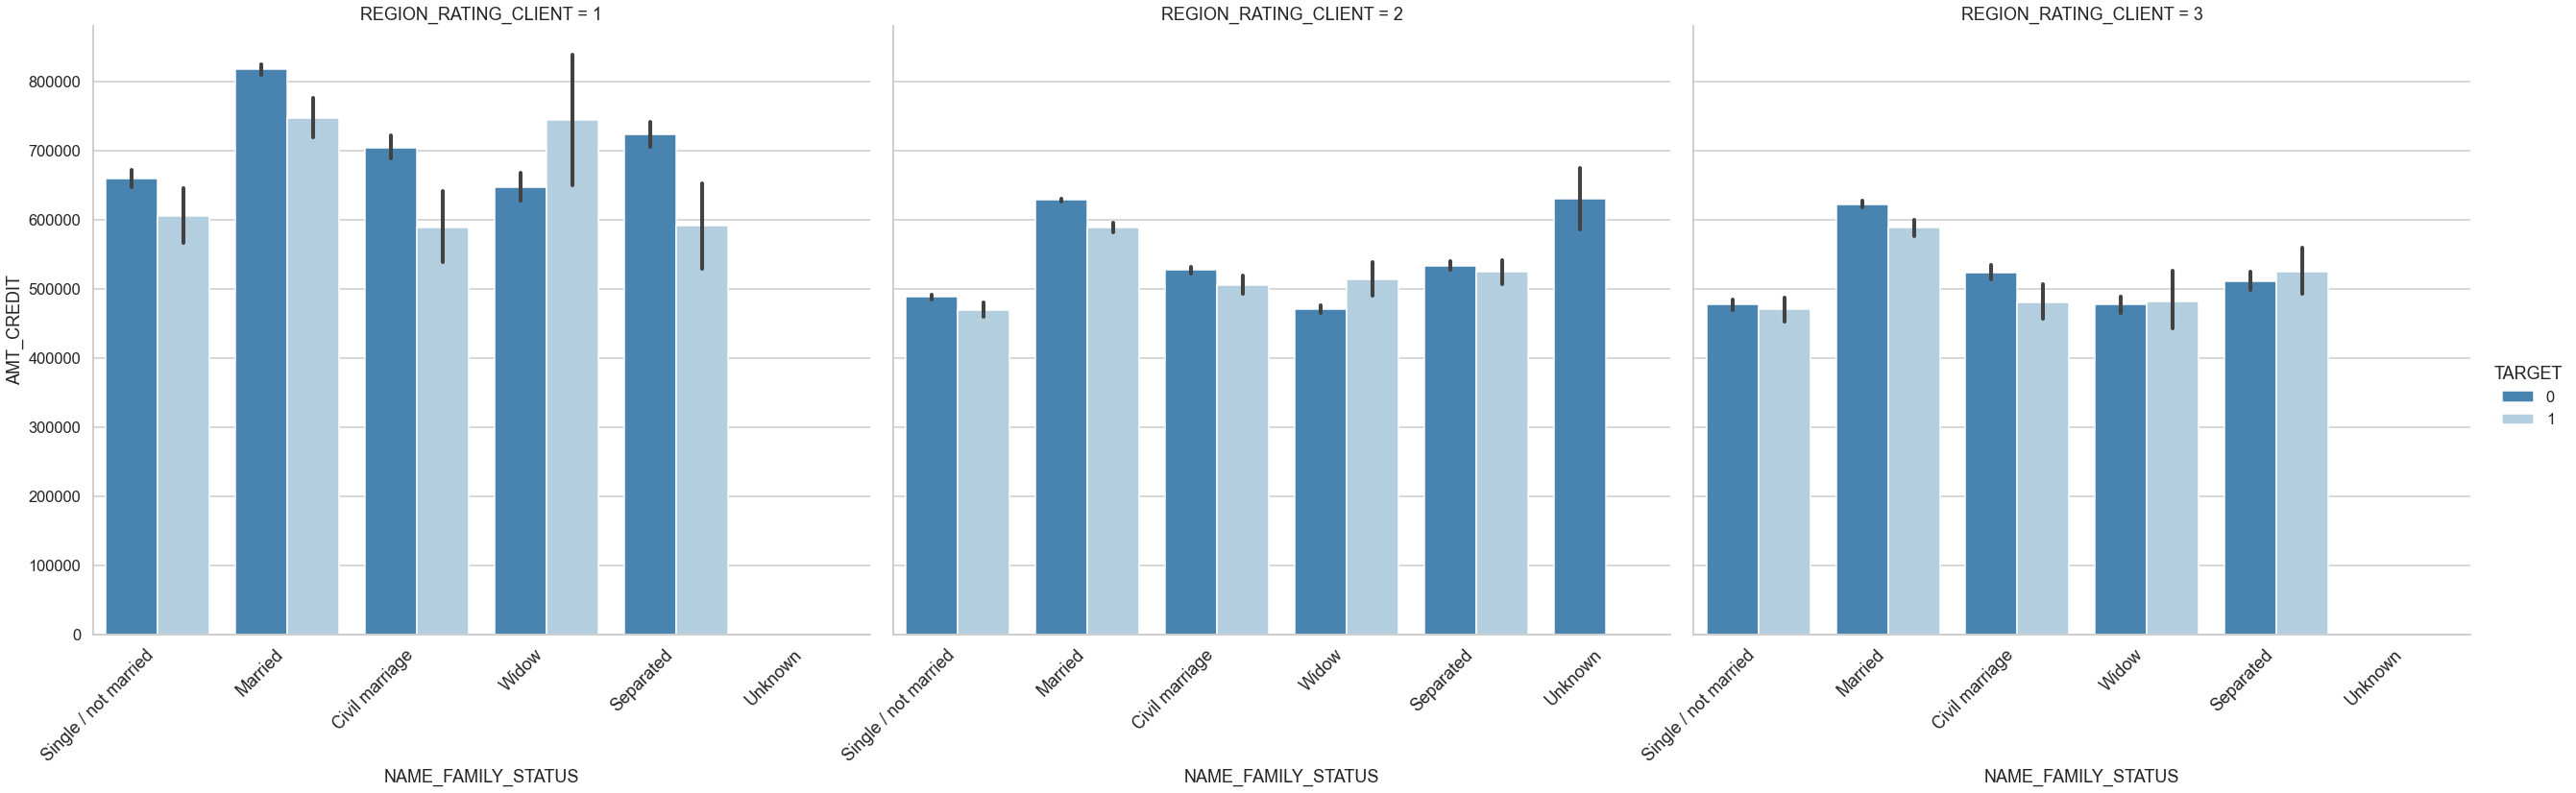

In [94]:
fig = sns.catplot(
    x='NAME_FAMILY_STATUS',
    y='AMT_CREDIT',
    hue='TARGET',
    col='REGION_RATING_CLIENT',
    kind='bar',
    palette='Blues_r',
    data=application_train,
    height=10,  # Menentukan tinggi grafik
    aspect=1.2  # Menentukan aspek grafik
)

fig.set_xticklabels(rotation=45, ha='right', fontsize=18)
plt.show()

- Pengaju pinjaman yang memiliki NAME_FAMILY_STATUS sebagai widow, baik tinggal di daerah dengan rating 1, 2, atau 3, mengalami kesulitan dalam membayar pinjaman untuk jumlah kredit yang moderat hingga tinggi.
- Pengaju pinjaman yang memiliki NAME_FAMILY_STATUS sebagai Separated, dan tinggal di daerah dengan rating 3, mengalami kesulitan dalam membayar pinjaman untuk jumlah kredit yang sedang dibandingkan dengan pengaju pinjaman yang tinggal di daerah dengan peringkat 1 atau 2.

## Preprocesing & Modeling

### Import Dataset

In [1]:
import pandas as pd
df = pd.read_csv('application_train.csv')

### Data Preprocessing

#### Handling Missing Value

In [2]:
# checking persentage missing value 
total_null = pd.DataFrame(df.isnull().sum(),columns=['Total_Null_Values'])
total_null['Percentage'] = (total_null['Total_Null_Values']/df.shape[0])*100
total_null = total_null.sort_values(by='Percentage', ascending=False).reset_index()

pd.set_option('display.max_rows', None)
total_null

,index,Total_Null_Values,Percentage
0,COMMONAREA_MEDI,214865,69.872297
1,COMMONAREA_AVG,214865,69.872297
2,COMMONAREA_MODE,214865,69.872297
3,NONLIVINGAPARTMENTS_MODE,213514,69.432963
4,NONLIVINGAPARTMENTS_AVG,213514,69.432963
5,NONLIVINGAPARTMENTS_MEDI,213514,69.432963
6,FONDKAPREMONT_MODE,210295,68.386172
7,LIVINGAPARTMENTS_MODE,210199,68.354953
8,LIVINGAPARTMENTS_AVG,210199,68.354953
9,LIVINGAPARTMENTS_MEDI,210199,68.354953


In [3]:
# Drop colums have more then 50% missing value
df.drop(df.iloc[:, 44:91], inplace=True, axis=1)
df.drop(['OWN_CAR_AGE','EXT_SOURCE_1'], inplace=True, axis=1)

# Filled Missing Value 
categorical = df.select_dtypes(include=['object']).columns.tolist()
numerical = df.select_dtypes(include=['int64','float64']).columns.tolist()

for column in df:
    if df[column].isnull().any():
        if(column in categorical):
            df[column]=df[column].fillna(df[column].mode()[0])
        else:
            df[column]=df[column].fillna(df[column].median())

# checking persentage missing value 
total_null = pd.DataFrame(df.isnull().sum(),columns=['Total_Null_Values'])
total_null['Percentage'] = (total_null['Total_Null_Values']/df.shape[0])*100
total_null = total_null.sort_values(by='Percentage', ascending=False).reset_index()

pd.set_option('display.max_rows', None)
total_null

,index,Total_Null_Values,Percentage
0,SK_ID_CURR,0,0.0
1,REG_CITY_NOT_WORK_CITY,0,0.0
2,FLAG_DOCUMENT_8,0,0.0
3,FLAG_DOCUMENT_7,0,0.0
4,FLAG_DOCUMENT_6,0,0.0
5,FLAG_DOCUMENT_5,0,0.0
6,FLAG_DOCUMENT_4,0,0.0
7,FLAG_DOCUMENT_3,0,0.0
8,FLAG_DOCUMENT_2,0,0.0
9,DAYS_LAST_PHONE_CHANGE,0,0.0


#### Handling Duplicate Value

In [4]:
df.duplicated().sum()

0

#### Handling Outliers

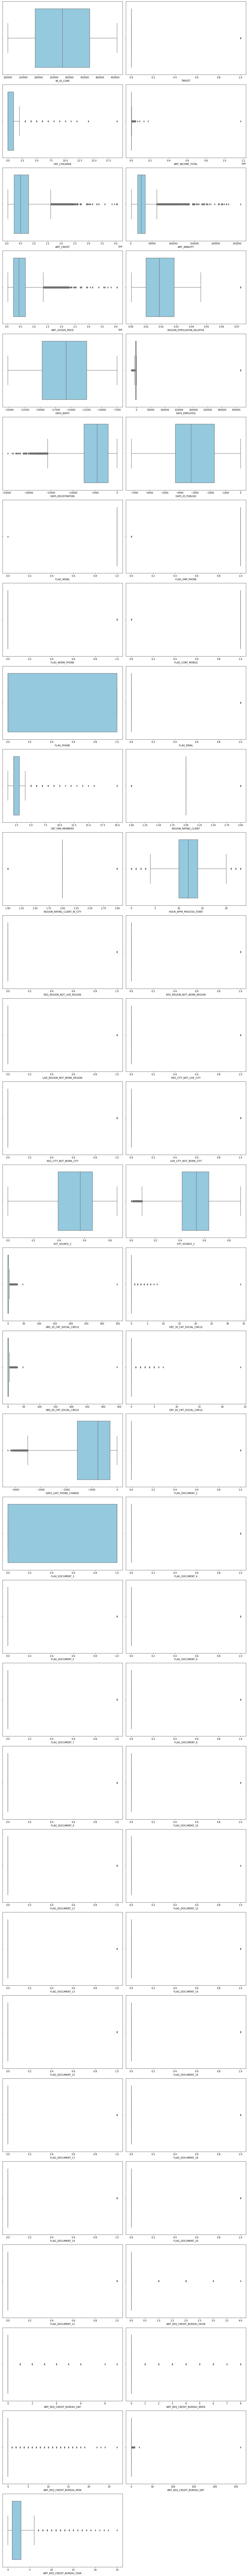

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

features = numerical
num_plots = len(features)
num_columns = 2  # Jumlah plot per baris
num_rows = math.ceil(num_plots / num_columns)  # Menghitung jumlah baris yang diperlukan

plt.figure(figsize=(15, 5*num_rows))  # Mengatur ukuran gambar sesuai jumlah baris

for i in range(num_plots):
    plt.subplot(num_rows, num_columns, i+1)
    sns.boxplot(x=df[features[i]], color='skyblue', orient='h')  # Mengatur orientasi menjadi horizontal
    plt.tight_layout()

plt.show()

- Outliers dipertahankan dalam dataframe karena kekhawatiran mengenai potensi hilangnya insight berharga.


#### Feature encoding

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

columns_to_encode = ["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", 
                     "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
                     "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]

for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

    
pd.set_option('display.max_columns', None)
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,6,7,4,3,1,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,8,1.0,2,2,6,10,0,0,0,0,0,0,5,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,1,4,1,1,1,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,3,2.0,1,1,1,11,0,0,0,0,0,0,39,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,6,7,4,3,1,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,8,1.0,2,2,1,9,0,0,0,0,0,0,11,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,6,7,4,0,1,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,8,2.0,2,2,6,17,0,0,0,0,0,0,5,0.650442,0.535276,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,6,7,4,3,1,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,3,1.0,2,2,4,11,0,0,0,0,1,1,37,0.322738,0.535276,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### Convert Negatif Value

In [7]:
cols_to_convert = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE']
df[cols_to_convert] = df[cols_to_convert].abs()

pd.set_option('display.max_columns', None)
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,6,7,4,3,1,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,8,1.0,2,2,6,10,0,0,0,0,0,0,5,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,1,4,1,1,1,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,3,2.0,1,1,1,11,0,0,0,0,0,0,39,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,6,7,4,3,1,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,8,1.0,2,2,1,9,0,0,0,0,0,0,11,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,6,7,4,0,1,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,8,2.0,2,2,6,17,0,0,0,0,0,0,5,0.650442,0.535276,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,6,7,4,3,1,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,3,1.0,2,2,4,11,0,0,0,0,1,1,37,0.322738,0.535276,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### Class Imbalace

In [8]:
df_majority = df[(df['TARGET']==0)] 
df_minority = df[(df['TARGET']==1)] 

print(df_majority.shape)
print(df_minority.shape)

(282686, 73)
(24825, 73)


In [9]:
from sklearn.utils import resample

# downsample majority class
df_majority_downsampled = resample(df_majority, 
                                   replace=False,   # sample without replacement
                                   n_samples=24825,  # match with minority class
                                   random_state=42) # reproducible results

# combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# reset index
df_downsampled.reset_index(drop=True, inplace=True)

# cheking upsample
df_majority = df_downsampled[df_downsampled['TARGET'] == 0]
df_minority = df_downsampled[df_downsampled['TARGET'] == 1]

# checking undersampled data
print(df_majority_downsampled.shape)
print(df_minority.shape)


(24825, 73)
(24825, 73)


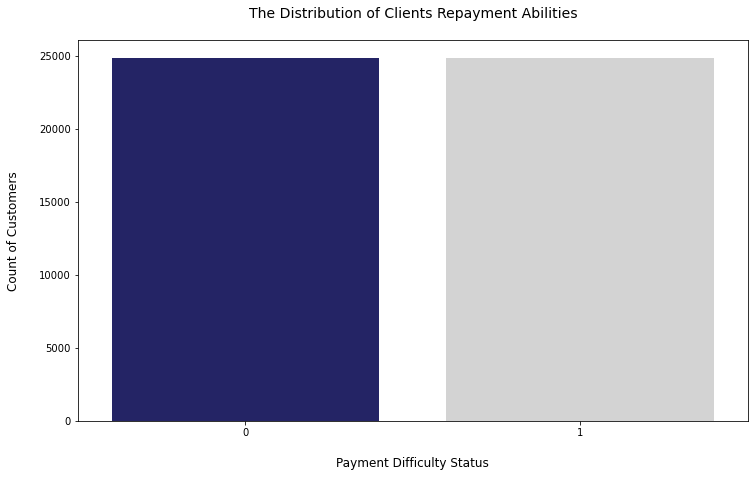

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
sns.countplot(data=df_downsampled, x='TARGET', palette=['midnightblue', 'lightgrey'])
plt.title('The Distribution of Clients Repayment Abilities\n', fontsize=14)
plt.ylabel('Count of Customers\n', fontsize=12)
plt.xlabel('\nPayment Difficulty Status', fontsize=12)
plt.show()

#### Feature Transformation

In [11]:
from sklearn.preprocessing import StandardScaler

# separated target with feature
target_column = df_downsampled['TARGET']

# drop target from features
df_without_target = df_downsampled.drop(columns=['TARGET'])

# satndarization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_without_target)

# make a new dataframe for scaled data
df_scaled = pd.DataFrame(scaled_data, columns=df_without_target.columns)

# reset index
target_column.reset_index(drop=True, inplace=True)
df_scaled.reset_index(drop=True, inplace=True)

# combine as before 
df_final = pd.concat([target_column, df_scaled], axis=1)

df_final.head()


,TARGET,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,0.546746,-0.299978,1.273193,1.445149,0.670801,0.751970,0.235286,1.375052,0.403230,1.695373,-2.433937,0.846824,0.573169,-0.401502,-0.331257,-0.141886,-0.860965,-0.435586,-1.240573,0.299187,0.0,0.424769,-0.526657,0.041897,1.668535,-0.244932,-1.084720,0.890594,1.755560,1.816164,0.417038,-0.902448,-0.130548,-0.236693,-0.206892,-0.327257,-0.599297,-0.497954,1.256037,0.717050,0.946744,-0.196528,-0.345696,-0.190704,-0.29943,-1.115413,-0.008976,0.592128,-0.007773,-0.126006,-0.285501,-0.011875,-0.289116,-0.060488,0.0,-0.057568,-0.004488,-0.05084,-0.049631,-0.029097,-0.090121,-0.014886,-0.084982,-0.024995,-0.022445,-0.019566,-0.07013,-0.061102,-0.155219,-0.272771,-0.378173,-0.457077
1,0,-1.635834,3.333573,-0.785293,-0.691970,0.670801,-0.591704,0.193017,0.366399,0.669638,0.588500,0.430014,-0.721339,-1.047437,-0.401502,-0.331257,2.002004,1.782893,2.354141,-0.143480,0.844557,0.0,-2.354223,-0.526657,0.041897,-0.599328,-0.244932,0.003864,-0.179774,-2.149879,-2.131413,-1.442455,-0.596616,-0.130548,-0.236693,-0.206892,-0.327257,-0.599297,-0.497954,1.403548,1.258208,0.876287,-0.622570,-0.345696,-0.620541,-0.29943,-0.946406,-0.008976,-1.688823,-0.007773,-0.126006,-0.285501,-0.011875,-0.289116,-0.060488,0.0,-0.057568,-0.004488,-0.05084,-0.049631,-0.029097,-0.090121,-0.014886,-0.084982,-0.024995,-0.022445,-0.019566,-0.07013,-0.061102,-0.155219,1.053161,-0.378173,0.104277
2,0,-0.008808,3.333573,-0.785293,1.445149,0.670801,0.751970,-0.060600,-0.582922,-0.649215,-0.453262,0.430014,0.846824,-1.857740,3.066136,-0.331257,-0.696247,0.850283,-0.414588,-0.067698,-0.207228,0.0,0.424769,-0.526657,0.041897,-0.599328,4.082773,0.548156,-0.179774,-0.197160,-0.157625,-0.047836,0.320880,-0.130548,-0.236693,-0.206892,-0.327257,-0.599297,-0.497954,-1.153305,0.966472,-1.948130,-0.622570,-0.345696,-0.620541,-0.29943,0.868855,-0.008976,-1.688823,-0.007773,-0.126006,-0.285501,-0.011875,-0.289116,-0.060488,0.0,-0.057568,-0.004488,-0.05084,-0.049631,-0.029097,-0.090121,-0.014886,-0.084982,-0.024995,-0.022445,-0.019566,-0.07013,-0.061102,-0.155219,-0.272771,-0.378173,-1.018431
3,0,0.737039,-0.299978,-0.785293,1.445149,-1.490756,-0.591704,-0.145139,-0.938917,-1.204122,-0.843923,0.430014,-1.505421,0.573169,1.332317,3.548643,-0.370580,-1.172374,-0.432020,0.002838,0.109034,0.0,0.424769,-0.526657,0.041897,1.668535,-0.244932,1.636741,-1.250142,-0.197160,-0.157625,0.881911,1.850041,-0.130548,-0.236693,-0.206892,-0.327257,1.668622,2.008219,0.665994,-0.830387,-1.490515,-0.622570,-0.345696,-0.620541,-0.29943,-0.678499,-0.008976,0.592128,-0.007773,-0.126006,-0.285501,-0.011875,-0.289116,-0.060488,0.0,-0.057568,-0.004488,-0.05084,-0.049631,-0.029097,-0.090121,

#### Feature Selection

In [12]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur dan target
X = df_final.drop(columns=['TARGET'])
y = df_final['TARGET']

# Bagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Modeling 

#### LogisticRegression

In [17]:
from sklearn.linear_model import LogisticRegression

# Inisialisasi model LogisticRegression
model_LogisticRegression = LogisticRegression(penalty = 'l2',
                                                     C = 10,
                                                     solver= 'liblinear',
                                                     max_iter = 100)

# Fit model
model_LogisticRegression.fit(X_train, y_train)

LogisticRegression(C=10, solver='liblinear')

Akurasi: 67.92%
Rata-rata Precision: 0.68
Rata-rata Recall: 0.68
Rata-rata F1-score: 0.68


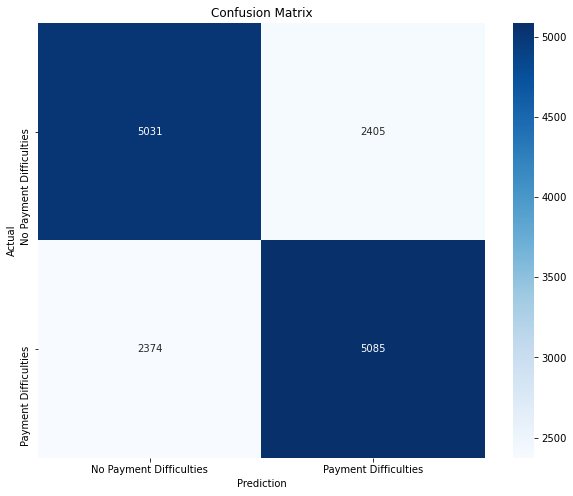

In [18]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Prediksi hasil pada data pengujian
y_pred = model_LogisticRegression.predict(X_test)

# Membuat laporan klasifikasi dalam bentuk dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# Mengambil metrik rata-rata dari dictionary
precision_avg = report['macro avg']['precision']
recall_avg = report['macro avg']['recall']
f1_score_avg = report['macro avg']['f1-score']
accuracy = report['accuracy']

# Mencetak hasil
print("Akurasi: {:.2f}%".format(accuracy * 100))
print("Rata-rata Precision: {:.2f}".format(precision_avg))
print("Rata-rata Recall: {:.2f}".format(recall_avg))
print("Rata-rata F1-score: {:.2f}".format(f1_score_avg))

# Menghitung matriks konfusi
confusion_mat = confusion_matrix(y_test, y_pred)

# Membuat plot matriks konfusi
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['No Payment Difficulties', 'Payment Difficulties'], 
            yticklabels=['No Payment Difficulties', 'Payment Difficulties'])
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [19]:
from sklearn.metrics import roc_auc_score

# Lakukan prediksi terhadap data uji menggunakan model Random Forest
y_pred_log = model_LogisticRegression.predict_proba(X_test)[:, 1]  # Mengambil probabilitas kelas positif

# Hitung ROC AUC score
roc_auc_log = roc_auc_score(y_test, y_pred_log)
print('ROC AUC Score untuk Logistic Regression:', roc_auc_log)

ROC AUC Score untuk Logistic Regression: 0.7411537743970428


In [20]:
from sklearn.model_selection import cross_val_score

# Menggunakan cross-validation
scores = cross_val_score(model_LogisticRegression, X_train, y_train, cv=5)

# Mencetak skor cross-validation secara rapi
for i, score in enumerate(scores, start=1):
    print(f"Fold-{i}: {score:.2f}")

print(f"Rata-rata: {scores.mean():.2f}")

Fold-1: 0.68
Fold-2: 0.68
Fold-3: 0.67
Fold-4: 0.68
Fold-5: 0.68
Rata-rata: 0.68


#### Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model Random Forest untuk klasifikasi
model_rf_classification = RandomForestClassifier(n_estimators=200,
                                                        min_samples_split=5,
                                                        min_samples_leaf=2,
                                                        max_features='sqrt',
                                                        max_depth=None,
                                                        bootstrap=False,
                                                        random_state=42)

# Fit model
model_rf_classification.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=42)

Akurasi: 67.57%
Rata-rata Precision: 0.68
Rata-rata Recall: 0.68
Rata-rata F1-score: 0.68


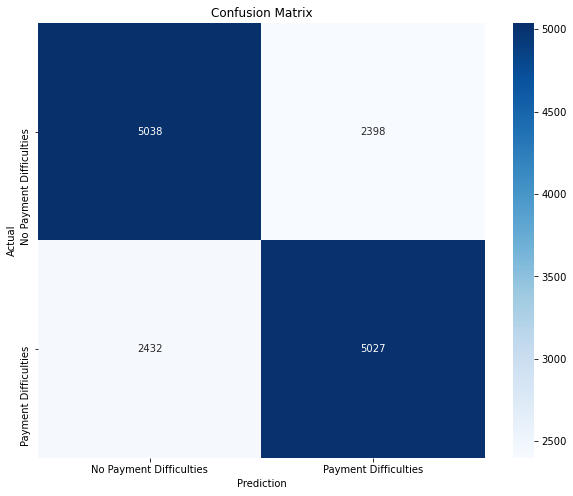

In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Prediksi hasil pada data pengujian
y_pred = model_rf_classification.predict(X_test)

# Membuat laporan klasifikasi dalam bentuk dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# Mengambil metrik rata-rata dari dictionary
precision_avg = report['macro avg']['precision']
recall_avg = report['macro avg']['recall']
f1_score_avg = report['macro avg']['f1-score']
accuracy = report['accuracy']

# Mencetak hasil
print("Akurasi: {:.2f}%".format(accuracy * 100))
print("Rata-rata Precision: {:.2f}".format(precision_avg))
print("Rata-rata Recall: {:.2f}".format(recall_avg))
print("Rata-rata F1-score: {:.2f}".format(f1_score_avg))

# Menghitung matriks konfusi
confusion_mat = confusion_matrix(y_test, y_pred)

# Membuat plot matriks konfusi
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['No Payment Difficulties', 'Payment Difficulties'], 
            yticklabels=['No Payment Difficulties', 'Payment Difficulties'])
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [20]:
from sklearn.metrics import roc_auc_score

# Lakukan prediksi terhadap data uji menggunakan model Random Forest
y_pred_rf = model_rf_classification.predict_proba(X_test)[:, 1]  # Mengambil probabilitas kelas positif

# Hitung ROC AUC score
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
print('ROC AUC Score untuk Random Forest:', roc_auc_rf)

ROC AUC Score untuk Random Forest: 0.7365365305953341


In [21]:
from sklearn.model_selection import cross_val_score

# Menggunakan cross-validation
scores = cross_val_score(model_rf_classification, X_train, y_train, cv=5)

# Mencetak skor cross-validation secara rapi
for i, score in enumerate(scores, start=1):
    print(f"Fold-{i}: {score:.2f}")

print(f"Rata-rata: {scores.mean():.2f}")

Fold-1: 0.67
Fold-2: 0.68
Fold-3: 0.68
Fold-4: 0.68
Fold-5: 0.67
Rata-rata: 0.68


#### GradientBoosting

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

# Inisialisasi model Gradient Boosting untuk klasifikasi
model_gb_classification = GradientBoostingClassifier(n_estimators=200,
                                                            subsample = 1.0,
                                                            min_samples_split = 2,
                                                            min_samples_leaf = 1,
                                                            max_features = 1,
                                                            learning_rate=0.1,
                                                            max_depth=4,
                                                            random_state=42)

# Fit model
model_gb_classification.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=4, max_features=1, n_estimators=200,
                           random_state=42)

Akurasi: 67.60%
Rata-rata Precision: 0.68
Rata-rata Recall: 0.68
Rata-rata F1-score: 0.68


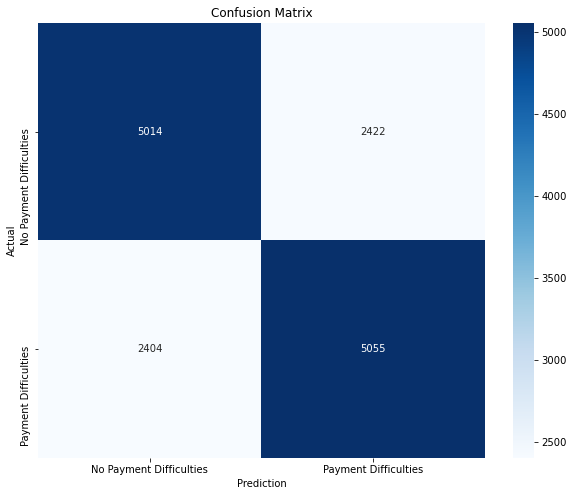

In [23]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Prediksi hasil pada data pengujian
y_pred = model_gb_classification.predict(X_test)

# Membuat laporan klasifikasi dalam bentuk dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# Mengambil metrik rata-rata dari dictionary
precision_avg = report['macro avg']['precision']
recall_avg = report['macro avg']['recall']
f1_score_avg = report['macro avg']['f1-score']
accuracy = report['accuracy']

# Mencetak hasil
print("Akurasi: {:.2f}%".format(accuracy * 100))
print("Rata-rata Precision: {:.2f}".format(precision_avg))
print("Rata-rata Recall: {:.2f}".format(recall_avg))
print("Rata-rata F1-score: {:.2f}".format(f1_score_avg))

# Menghitung matriks konfusi
confusion_mat = confusion_matrix(y_test, y_pred)

# Membuat plot matriks konfusi
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['No Payment Difficulties', 'Payment Difficulties'], 
            yticklabels=['No Payment Difficulties', 'Payment Difficulties'])
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [24]:
from sklearn.metrics import roc_auc_score

# Lakukan prediksi terhadap data uji menggunakan model Random Forest
y_pred_gb = model_gb_classification.predict_proba(X_test)[:, 1]  # Mengambil probabilitas kelas positif

# Hitung ROC AUC score
roc_auc_gb = roc_auc_score(y_test, y_pred_gb)
print('ROC AUC Score untuk Gradient Boosting:', roc_auc_rf)

ROC AUC Score untuk Gradient Boosting: 0.7365365305953341


In [25]:
from sklearn.model_selection import cross_val_score

# Menggunakan cross-validation
scores = cross_val_score(model_gb_classification, X_train, y_train, cv=5)

# Mencetak skor cross-validation secara rapi
for i, score in enumerate(scores, start=1):
    print(f"Fold-{i}: {score:.2f}")

print(f"Rata-rata: {scores.mean():.2f}")

Fold-1: 0.67
Fold-2: 0.67
Fold-3: 0.67
Fold-4: 0.68
Fold-5: 0.68
Rata-rata: 0.68


### Best Model

- Keputusan untuk menggunakan model Logistic Regression didasarkan pada penilaian seimbang antara Precision dan Recall dan akurasi yang dihasilkan oleh model ini, selain nilai ROC AUC model ini cukup memuaskan. Pemilihan ini mempertimbangkan bahwa keseimbangan tersebut dapat mengurangi risiko kesalahan yang memiliki potensi dampak pada pengambilan keputusan bisnis. Meskipun demikian, penting untuk dicatat bahwa ketiga model yang dievaluasi masih belum optimal karena keterbatasan waktu dan sumber daya. Terdapat ruang untuk melakukan penyempurnaan lebih lanjut terhadap model-model tersebut

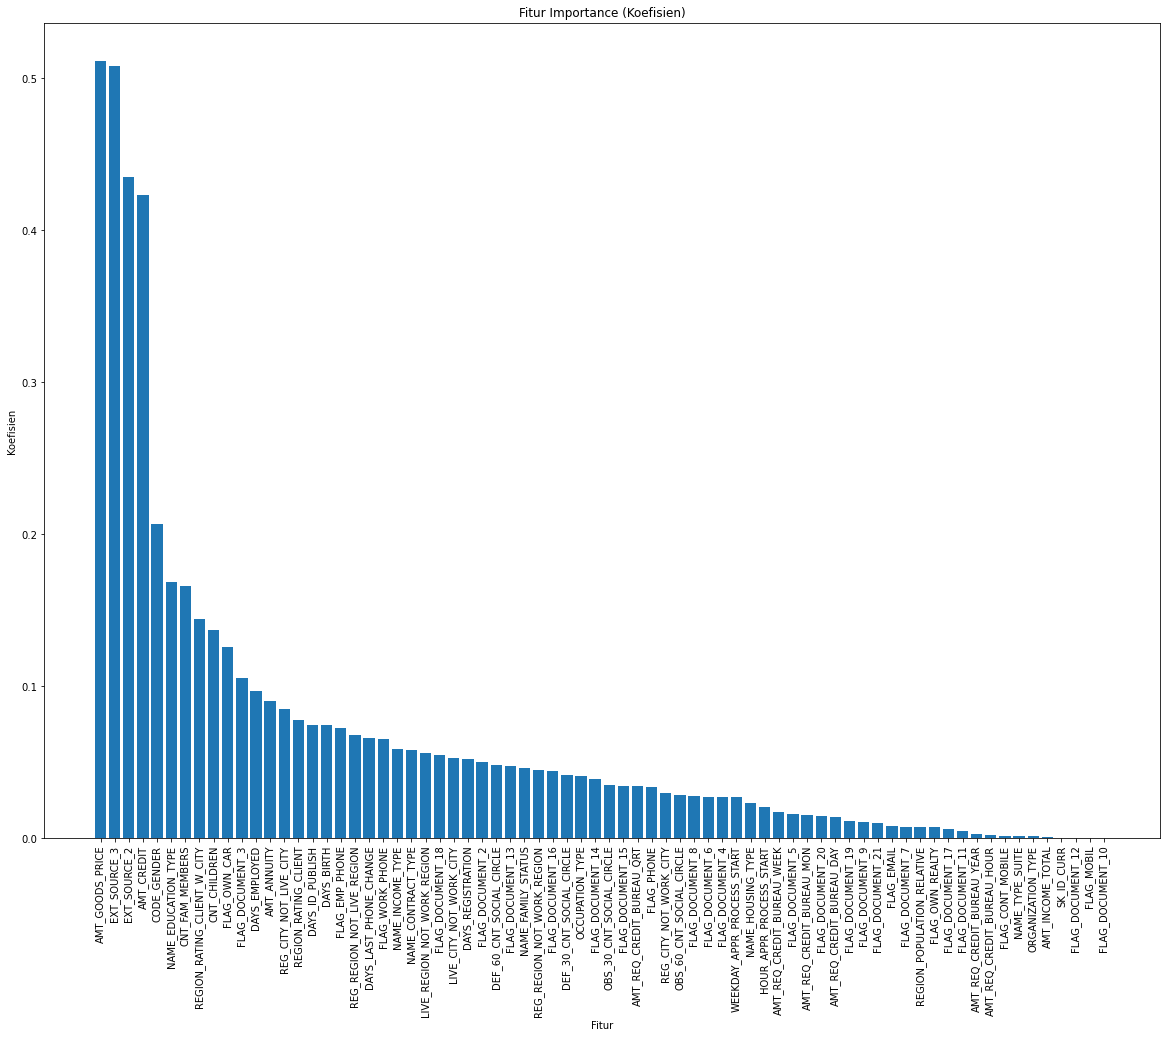

In [67]:
import numpy as np

# Mendapatkan nama fitur (kolom) dari data
feature_names = X.columns

# Mendapatkan koefisien dari fitur-fitur
coefficients = model_LogisticRegression.coef_[0]

# Mengurutkan koefisien fitur secara menurun
indices = np.argsort(np.abs(coefficients))[::-1]
sorted_feature_names = [feature_names[i] for i in indices]

# Membuat grafik batang fitur importance
plt.figure(figsize=(20, 15))
plt.title("Fitur Importance (Koefisien)")
plt.bar(range(len(sorted_feature_names)), np.abs(coefficients[indices]), align="center")
plt.xticks(range(len(sorted_feature_names)), sorted_feature_names, rotation=90)
plt.xlabel("Fitur")
plt.ylabel("Koefisien")
plt.show()


## Predicted

### Import Dataset

In [94]:
import pandas as pd
df2 = pd.read_csv('application_test.csv')

### Data Preprocessing

#### Handling Missing Value

In [95]:
# checking persentage missing value 
total_null = pd.DataFrame(df2.isnull().sum(),columns=['Total_Null_Values'])
total_null['Percentage'] = (total_null['Total_Null_Values']/df2.shape[0])*100
total_null = total_null.sort_values(by='Percentage', ascending=False).reset_index()

pd.set_option('display.max_rows', None)
total_null

,index,Total_Null_Values,Percentage
0,COMMONAREA_AVG,33495,68.716150
1,COMMONAREA_MODE,33495,68.716150
2,COMMONAREA_MEDI,33495,68.716150
3,NONLIVINGAPARTMENTS_AVG,33347,68.412523
4,NONLIVINGAPARTMENTS_MODE,33347,68.412523
5,NONLIVINGAPARTMENTS_MEDI,33347,68.412523
6,FONDKAPREMONT_MODE,32797,67.284179
7,LIVINGAPARTMENTS_AVG,32780,67.249302
8,LIVINGAPARTMENTS_MODE,32780,67.249302
9,LIVINGAPARTMENTS_MEDI,32780,67.249302


In [96]:
# Drop colums have more then 50% missing value
df2.drop(df2.iloc[:, 43:90], inplace=True, axis=1)
df2.drop(['OWN_CAR_AGE','EXT_SOURCE_1'], inplace=True, axis=1)

# Filled Missing Value 
categorical = df2.select_dtypes(include=['object']).columns.tolist()
numerical = df2.select_dtypes(include=['int64','float64']).columns.tolist()

for column in df2:
    if df2[column].isnull().any():
        if(column in categorical):
            df2[column]=df2[column].fillna(df2[column].mode()[0])
        else:
            df2[column]=df2[column].fillna(df2[column].median())

# checking persentage missing value 
total_null = pd.DataFrame(df2.isnull().sum(),columns=['Total_Null_Values'])
total_null['Percentage'] = (total_null['Total_Null_Values']/df2.shape[0])*100
total_null = total_null.sort_values(by='Percentage', ascending=False).reset_index()

pd.set_option('display.max_rows', None)
total_null

,index,Total_Null_Values,Percentage
0,SK_ID_CURR,0,0.0
1,NAME_CONTRACT_TYPE,0,0.0
2,FLAG_DOCUMENT_8,0,0.0
3,FLAG_DOCUMENT_7,0,0.0
4,FLAG_DOCUMENT_6,0,0.0
5,FLAG_DOCUMENT_5,0,0.0
6,FLAG_DOCUMENT_4,0,0.0
7,FLAG_DOCUMENT_3,0,0.0
8,FLAG_DOCUMENT_2,0,0.0
9,DAYS_LAST_PHONE_CHANGE,0,0.0


#### Handling Duplicate Value

In [97]:
df2.duplicated().sum()

0

#### Feature encoding

In [98]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

columns_to_encode = ["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", 
                     "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
                     "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]

for column in columns_to_encode:
    df2[column] = label_encoder.fit_transform(df2[column])

    
pd.set_option('display.max_columns', None)
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,6,7,4,3,1,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,8,1.0,2,2,6,10,0,0,0,0,0,0,5,0.262949,0.139376,2.0,2.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,1,4,1,1,1,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,3,2.0,1,1,1,11,0,0,0,0,0,0,39,0.622246,0.535276,1.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,6,7,4,3,1,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,8,1.0,2,2,1,9,0,0,0,0,0,0,11,0.555912,0.729567,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,6,7,4,0,1,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,8,2.0,2,2,6,17,0,0,0,0,0,0,5,0.650442,0.535276,2.0,0.0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,6,7,4,3,1,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,3,1.0,2,2,4,11,0,0,0,0,1,1,37,0.322738,0.535276,0.0,0.0


#### Convert Negatif Value



In [100]:
cols_to_convert = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE']
df2[cols_to_convert] = df2[cols_to_convert].abs()

pd.set_option('display.max_columns', None)
df2.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,6,6,1,1,1,0.018850,19241,2329,5170.0,812,1,1,0,1,0,1,8,2.0,2,2,5,18,0,0,0,0,0,0,28,0.789654,0.159520,0.0,0.0,0.0,0.0,1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,6,6,4,1,1,0.035792,18064,4469,9118.0,1623,1,1,0,1,0,0,9,2.0,2,2,0,9,0,0,0,0,0,0,42,0.291656,0.432962,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,6,6,1,1,1,0.019101,20038,4458,2175.0,3503,1,1,0,1,0,0,4,2.0,2,2,1,14,0,0,0,0,0,0,54,0.699787,0.610991,0.0,0.0,0.0,0.0,856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,6,6,4,1,1,0.026392,13976,1866,2000.0,4208,1,1,0,1,1,0,14,4.0,2,2,6,11,0,0,0,0,0,0,5,0.509677,0.612704,0.0,0.0,0.0,0.0,1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,6,6,4,1,1,0.010032,13040,2191,4000.0,4262,1,1,1,1,0,0,8,3.0,2,2,0,5,0,0,0,0,1,1,5,0.425687,0.519097,0.0,0.0,0.0,0.0,821.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


#### Predicted

In [105]:
pred_test = df2[['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
                 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
                 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
                 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
                 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
                 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
                 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
                 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
                 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
                 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
                 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
                 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
                 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
                 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
                 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
                 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
                 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
                 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
                 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
                 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
                 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
                 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
                 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
                 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']]
pred_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,6,6,1,1,1,0.018850,19241,2329,5170.0,812,1,1,0,1,0,1,8,2.0,2,2,5,18,0,0,0,0,0,0,28,0.789654,0.159520,0.0,0.0,0.0,0.0,1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,6,6,4,1,1,0.035792,18064,4469,9118.0,1623,1,1,0,1,0,0,9,2.0,2,2,0,9,0,0,0,0,0,0,42,0.291656,0.432962,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,6,6,1,1,1,0.019101,20038,4458,2175.0,3503,1,1,0,1,0,0,4,2.0,2,2,1,14,0,0,0,0,0,0,54,0.699787,0.610991,0.0,0.0,0.0,0.0,856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,6,6,4,1,1,0.026392,13976,1866,2000.0,4208,1,1,0,1,1,0,14,4.0,2,2,6,11,0,0,0,0,0,0,5,0.509677,0.612704,0.0,0.0,0.0,0.0,1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,6,6,4,1,1,0.010032,13040,2191,4000.0,4262,1,1,1,1,0,0,8,3.0,2,2,0,5,0,0,0,0,1,1,5,0.425687,0.519097,0.0,0.0,0.0,0.0,821.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [106]:
predict = pd.Series(model_LogisticRegression.predict(pred_test), name = "TARGET").astype(int)
results = pd.concat([df2['SK_ID_CURR'], predict],axis = 1)
results.to_csv("predict application.csv", index = False)
results.head()

,SK_ID_CURR,TARGET
0,100001,1
1,100005,1
2,100013,0
3,100028,0
4,100038,0
